In [1]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
################################      T E S T D E V      O N     F X C M      3      ######################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

In [1]:
# CLEAR VAR
from clearall import clearall
clearall()

In [2]:
##### NETTOYAGE DES BASES POUR LES 3 TIMEFRAMEs (prévoir 16 min)

from cleanbasefxcm import clean_base, scrap_ini
import configparser
from scraptickers import scrap_tickers

config = configparser.ConfigParser()

config.read('config.ini')
_period1 = config.get('TIMEFRAME','_period1') # 'm5'
_period2 = config.get('TIMEFRAME','_period2') # 'H1'
_period3 = config.get('TIMEFRAME','_period3') # 'D1'
_path1 = config.get('PATH','_path1') # 'Base/'
_path2 = config.get('PATH','_path2') # 'Base_Clean/'
_path3 = config.get('PATH','_path3') # 'Base_Input/'
TICKERS = scrap_tickers(_path1)
config['TICKERS']['TICKERS'] = \
            str(TICKERS).replace("'",'').replace('[','').replace(']','').replace(',','').replace(' ',',')

config['PATH']['_path'] = _path1

with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)


clean_base()

Base/
Début des opérations pour la timeframe m5
  Reindexation de la base  EUR/GBP 

 ===&gt; Opération terminée. Tout est nettoyé et prêt à l&#39;utilisation pour la time frame m5
Début des opérations pour la timeframe H1
  Reindexation de la base  EUR/GBP 

 ===&gt; Opération terminée. Tout est nettoyé et prêt à l&#39;utilisation pour la time frame H1
Début des opérations pour la timeframe D1
  Reindexation de la base  EUR/GBP 

 ===&gt; Opération terminée. Tout est nettoyé et prêt à l&#39;utilisation pour la time frame D1
Temps d&#39;excution du module 0:18:52.764211


()

In [1]:
########
## GENERATION DES INPUTS
#####

In [1]:
###### CREATION DES INPUTS SUR LES 3 TIMEFRAMES (prévoir 18 minutes environ pour le tout)
import datetime as dt
from scraptickers import scrap_tickers
import multiprocessing.dummy as mp
from setinputs import set_inputs
import configparser
config = configparser.ConfigParser()

config.read('config.ini')
_period1 = config.get('TIMEFRAME','_period1') # 'm5'
_period2 = config.get('TIMEFRAME','_period2') # 'H1'
_period3 = config.get('TIMEFRAME','_period3') # 'D1'
_path1 = config.get('PATH','_path1') # 'Base/'
_path2 = config.get('PATH','_path2') # 'Base_Clean'
_path3 = config.get('PATH','_path3') # 'Base_Input'
config['PATH']['_path'] = _path2

with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)

TICKERS = scrap_tickers(_path2)
config['TICKERS']['TICKERS'] = \
            str(TICKERS).replace("'",'').replace('[','').replace(']','').replace(',','').replace(' ',',')

with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())

#p=mp.Pool(os.cpu_count())
#p.map(set_inputs,TICKERS) 
#p.close()
#p.join()

for x in TICKERS:
    set_inputs(x)

print("\n\n ===> Création des inputs terminée. Tout est nettoyé et prêt à l'utilisation")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))



Base_Clean/
Début des opérations horodatée à 2020-11-05 12:02:13.279992
  Génération des inputs pour le ticker  CHF/JPY 

 ===> Création des inputs terminée. Tout est nettoyé et prêt à l'utilisation
Temps d'excution du module 0:17:29.691554


In [1]:
########
## GENERATION DES SIGNAUX
#####

In [1]:
###### CREATION DES SIGNAUX SUR LES 3 TIMEFRAMES (prévoir 1 min environ pour le tout)

import datetime as dt
from scraptickers import scrap_tickers
import multiprocessing.dummy as mp
from strat_stoch import gen_sig
from tqdm import tqdm
import configparser
config = configparser.ConfigParser()

config.read('config.ini')
_period1 = config.get('TIMEFRAME','_period1') # 'm5'
_period2 = config.get('TIMEFRAME','_period2') # 'H1'
_period3 = config.get('TIMEFRAME','_period3') # 'D1'
_path1 = config.get('PATH','_path1') # 'Base/'
_path2 = config.get('PATH','_path2') # 'Base_Clean/'
_path3 = config.get('PATH','_path3') # 'Base_Input/'
_path4 = config.get('PATH','_path4') # 'Base_Signals/'
_path5 = config.get('PATH','_path5') # 'Base_bt/'
_path = _path3
config['PATH']['_path'] = _path

with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)

TICKERS = scrap_tickers(_path)
config['TICKERS']['TICKERS'] = \
            str(TICKERS).replace("'",'').replace('[','').replace(']','').replace(',','').replace(' ',',')

with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)


_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
p=mp.Pool(os.cpu_count())
p.map(gen_sig,TICKERS) 
p.close()
p.join()
print("\n\n ===> Génération des signaux terminée. Tout est prêt à l'utilisation")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

Importing Librairies...
Librairies imported

Base_Input/
Début des opérations horodatée à 2020-11-05 13:34:04.129593
  Génération des signaux pour le ticker  EUR/NZD 

 ===> Génération des signaux terminée. Tout est prêt à l'utilisation
Temps d'excution du module 0:01:09.021547


Base_Signals/
Début des opérations horodatée à 2020-11-05 13:35:48.496778
 Bagging K Neigbhors Classifier imbalanced pour  USD/CHF 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 18:05:00  1.01133  1.01162  1.01118   1.01152   1.0115  1.01183   

    LowAsk  CloseAsk  Total  ...   BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.01135   1.01173    135  ...  1.01105  1.008878            0.507227   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.815431         0.814747        0.004299          0.724581   

   Signal  BUY  SELL  
0      -1    0     1  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3578, 1: 512})
Signaux vente avant oversampling Counter({0: 3693, 1: 593})
Signaux achat après oversampling Counter({0: 1954, 1: 634})
Signaux vente après oversampling Counter({0: 2023, 1: 623})
 Achat pour  USD/CHF 

Achat - Accuracy : 78.31 %
Achat - Precision : 78.65 %
Achat - Recal

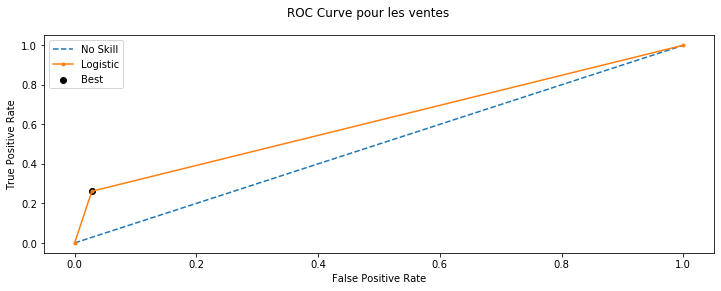

Best Threshold=0.000000, F-Score=0.394


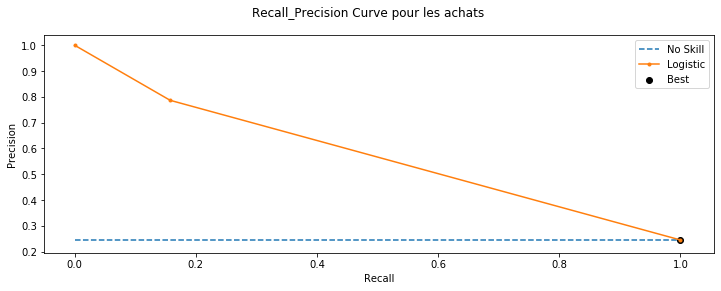

Best Threshold=1.000000, F-Score=0.386


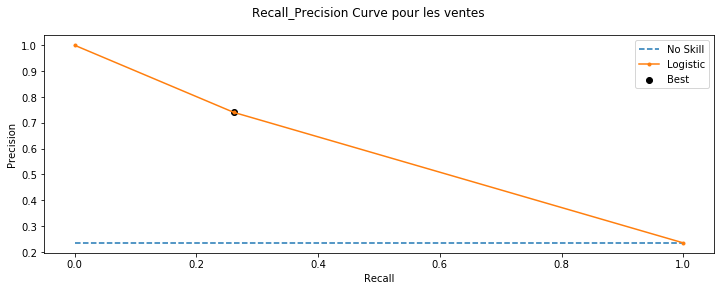

 Bagging K Neigbhors Classifier imbalanced pour  USD/NOK 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 19:50:00   6.2107   6.2156  6.2107    6.2156  6.21459   6.2193   

    LowAsk  CloseAsk  Total  ...  BOLMID  BOLLOW  delta_price_BOLLOW  \
0  6.21459    6.2193     55  ...  6.1718  6.1155            0.129126   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.699163         0.397038        0.008542          0.270743   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3589, 1: 632})
Signaux vente avant oversampling Counter({0: 3588, 1: 643})
Signaux achat après oversampling Counter({0: 1923, 1: 819})
Signaux vente après oversampling Counter({0: 1811, 1: 712})
 Achat pour  USD/NOK 

Achat - Accuracy : 81.56 %
Achat - Precision : 73.05 %
Achat - Recall : 60.56 %
Achat - F-measure: : 66.22 % 


              precision    recall  f1-

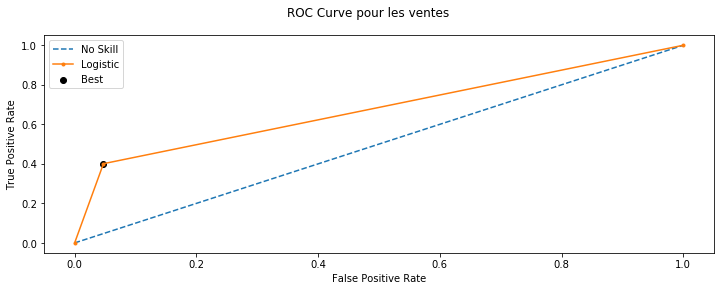

Best Threshold=1.000000, F-Score=0.662


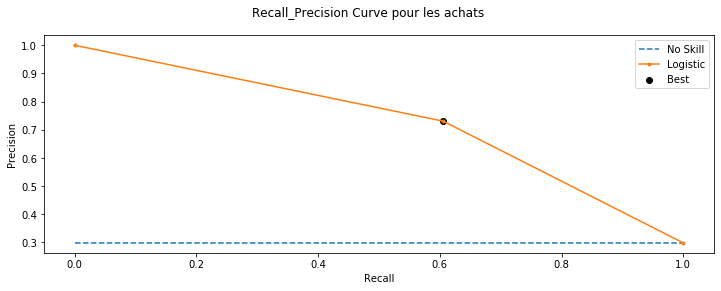

Best Threshold=1.000000, F-Score=0.527


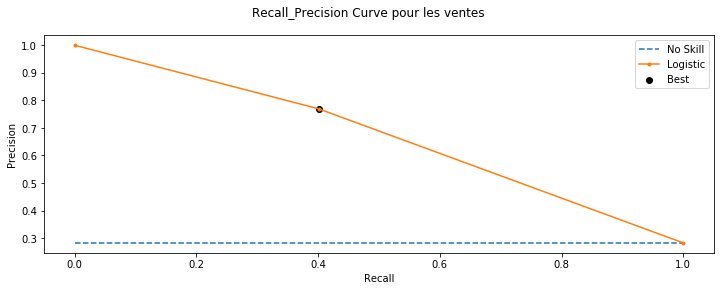

 Bagging K Neigbhors Classifier imbalanced pour  CHF/JPY 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 21:30:00   82.834   82.842  82.821    82.837   82.876   82.886   

   LowAsk  CloseAsk  Total  ...     BOLMID     BOLLOW  delta_price_BOLLOW  \
0  82.871    82.878     31  ...  82.961234  82.570428            0.161471   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.443794         0.404984         0.00185          0.277896   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3598, 1: 642})
Signaux vente avant oversampling Counter({0: 3636, 1: 636})
Signaux achat après oversampling Counter({0: 1935, 1: 754})
Signaux vente après oversampling Counter({0: 2000, 1: 875})
 Achat pour  CHF/JPY 

Achat - Accuracy : 77.8 %
Achat - Precision : 67.41 %
Achat - Recall : 40.34 %
Achat - F-measure: : 50.47 % 


              precision    re

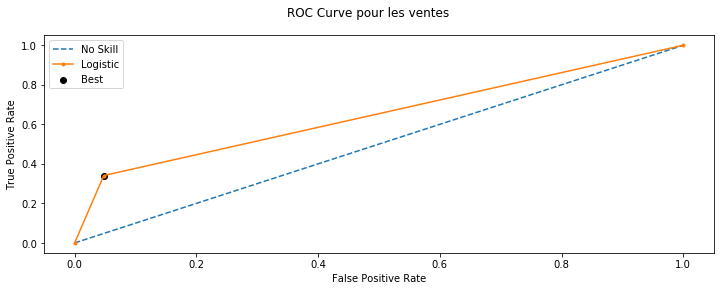

Best Threshold=1.000000, F-Score=0.505


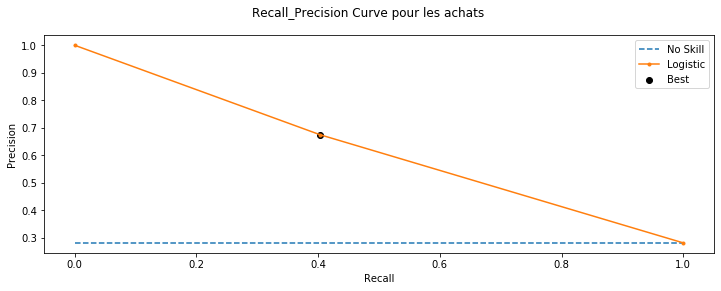

Best Threshold=1.000000, F-Score=0.470


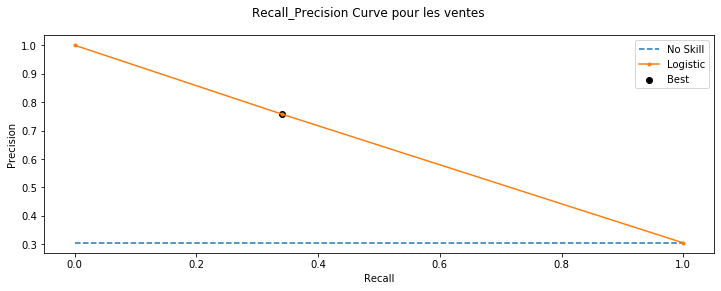

 Bagging K Neigbhors Classifier imbalanced pour  NZD/CAD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 17:10:00  0.75361  0.75364  0.75335   0.75338  0.75423  0.75423   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  0.75395   0.75401     78  ...  0.749903  0.746316            0.394882   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.816703         0.726878         0.00731          0.561206   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3693, 1: 483})
Signaux vente avant oversampling Counter({0: 3768, 1: 510})
Signaux achat après oversampling Counter({0: 2136, 1: 803})
Signaux vente après oversampling Counter({0: 2092, 1: 770})
 Achat pour  NZD/CAD 

Achat - Accuracy : 77.6 %
Achat - Precision : 77.01 %
Achat - Recall : 25.62 %
Achat - F-measure: : 38.45 % 


              precision    re

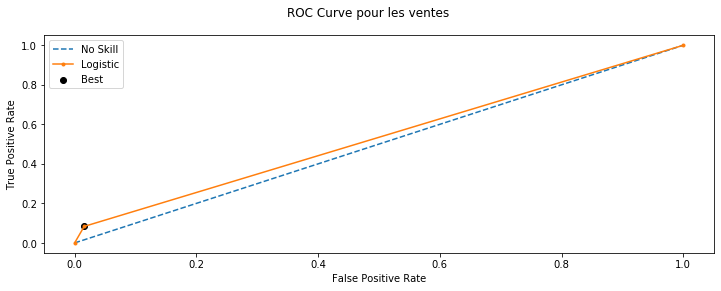

Best Threshold=0.000000, F-Score=0.429


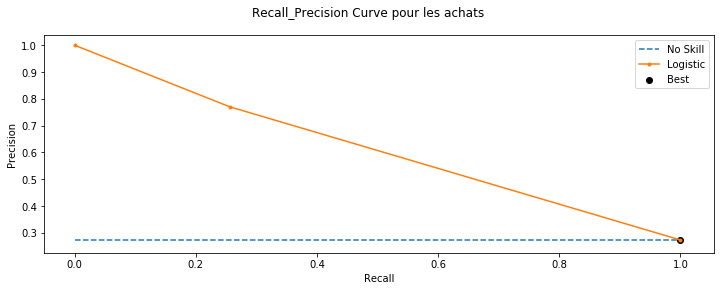

Best Threshold=0.000000, F-Score=0.424


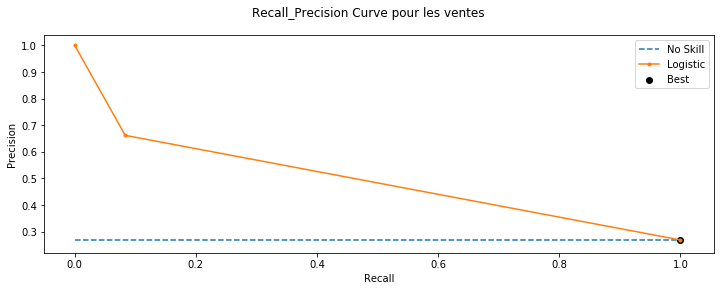

 Bagging K Neigbhors Classifier imbalanced pour  GBP/USD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 17:20:00   1.5333   1.5333  1.53279   1.53312  1.53349  1.53349   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.53295   1.53329    101  ...  1.536092  1.530297            0.510066   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.854282         0.727871        0.009036          0.607334   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3877, 1: 498})
Signaux vente avant oversampling Counter({0: 3747, 1: 498})
Signaux achat après oversampling Counter({0: 1979, 1: 762})
Signaux vente après oversampling Counter({0: 1918, 1: 678})
 Achat pour  GBP/USD 

Achat - Accuracy : 81.45 %
Achat - Precision : 72.75 %
Achat - Recall : 53.1 %
Achat - F-measure: : 61.39 % 


              precision    re

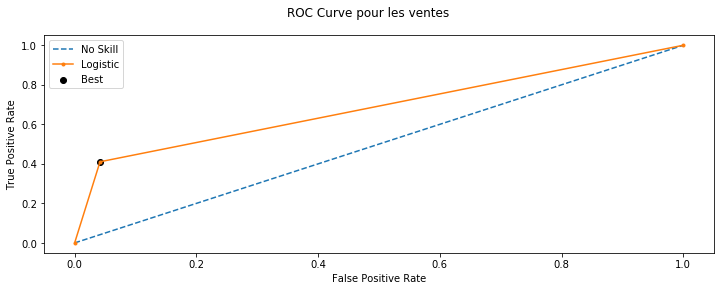

Best Threshold=1.000000, F-Score=0.614


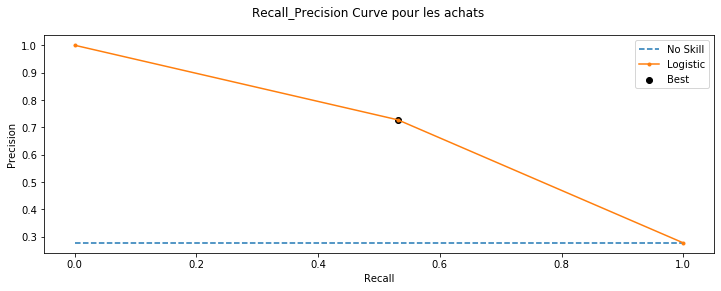

Best Threshold=1.000000, F-Score=0.537


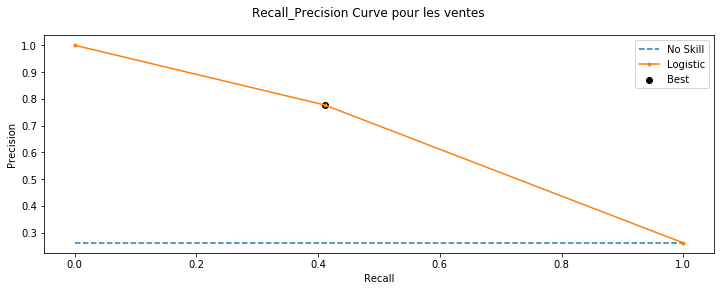

 Bagging K Neigbhors Classifier imbalanced pour  USD/CAD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 18:45:00   1.0461  1.04611  1.04593   1.04599  1.04636  1.04636   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.04614   1.04619     94  ...  1.039918  1.033154            0.433809   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.744147         0.625295         0.00661          0.483677   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3785, 1: 442})
Signaux vente avant oversampling Counter({0: 3955, 1: 493})
Signaux achat après oversampling Counter({0: 2063, 1: 709})
Signaux vente après oversampling Counter({0: 2244, 1: 891})
 Achat pour  USD/CAD 

Achat - Accuracy : 79.29 %
Achat - Precision : 79.38 %
Achat - Recall : 25.6 %
Achat - F-measure: : 38.72 % 


              precision    re

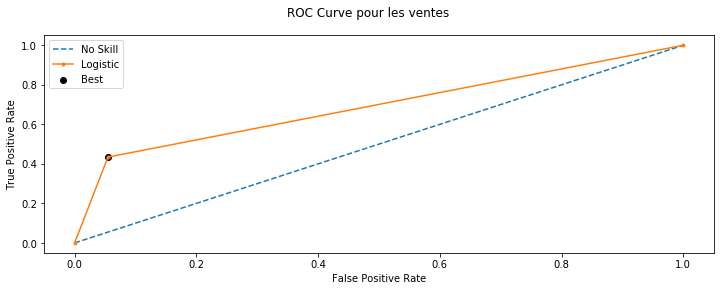

Best Threshold=0.000000, F-Score=0.407


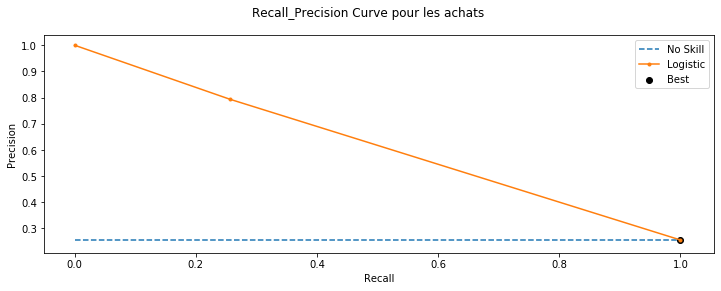

Best Threshold=1.000000, F-Score=0.552


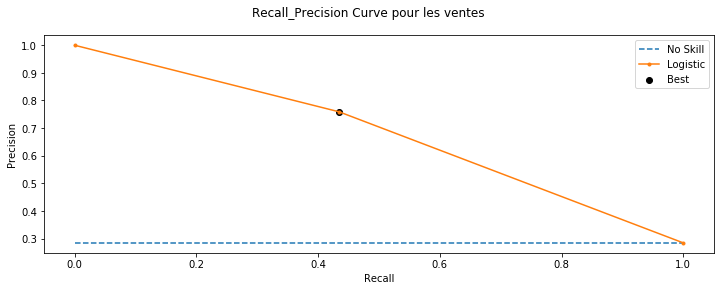

 Bagging K Neigbhors Classifier imbalanced pour  EUR/TRY 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-08 14:45:00  1.92899  1.93139  1.92859   1.93052  1.93013  1.93262   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.92981   1.93181    362  ...  1.925032  1.919844            0.129166   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.661436         0.580289        0.005947          0.452216   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3222, 1: 563})
Signaux vente avant oversampling Counter({0: 3183, 1: 499})
Signaux achat après oversampling Counter({0: 1703, 1: 738})
Signaux vente après oversampling Counter({0: 1827, 1: 799})
 Achat pour  EUR/TRY 

Achat - Accuracy : 77.82 %
Achat - Precision : 74.13 %
Achat - Recall : 41.01 %
Achat - F-measure: : 52.8 % 


              precision    re

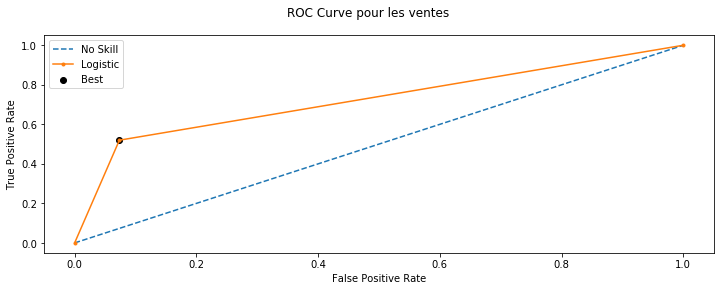

Best Threshold=1.000000, F-Score=0.528


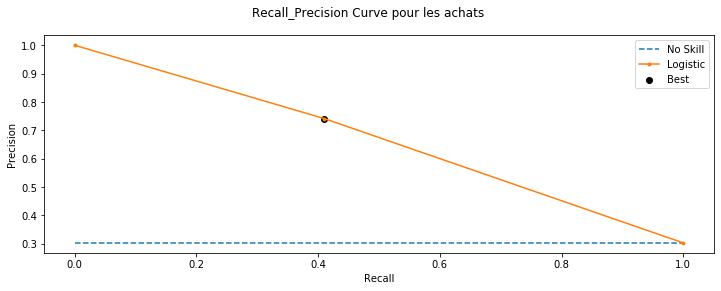

Best Threshold=1.000000, F-Score=0.616


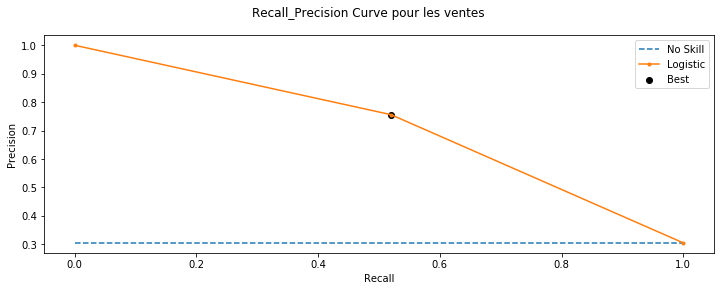

 Bagging K Neigbhors Classifier imbalanced pour  AUD/JPY 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-08 09:50:00   76.749   76.799  76.723    76.738   76.778   76.827   

   LowAsk  CloseAsk  Total  ...     BOLMID     BOLLOW  delta_price_BOLLOW  \
0  76.748    76.766    204  ...  76.369107  76.079038            0.509253   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0            0.81617         0.781538         0.01581          0.702979   

   Signal  BUY  SELL  
0      -1    1     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3528, 1: 830})
Signaux vente avant oversampling Counter({0: 3664, 1: 955})
Signaux achat après oversampling Counter({0: 1652, 1: 622})
Signaux vente après oversampling Counter({0: 1595, 1: 628})
 Achat pour  AUD/JPY 

Achat - Accuracy : 74.06 %
Achat - Precision : 60.38 %
Achat - Recall : 14.71 %
Achat - F-measure: : 23.66 % 


              precision    r

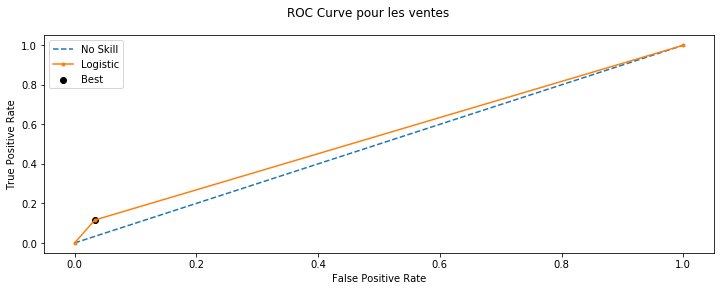

Best Threshold=0.000000, F-Score=0.429


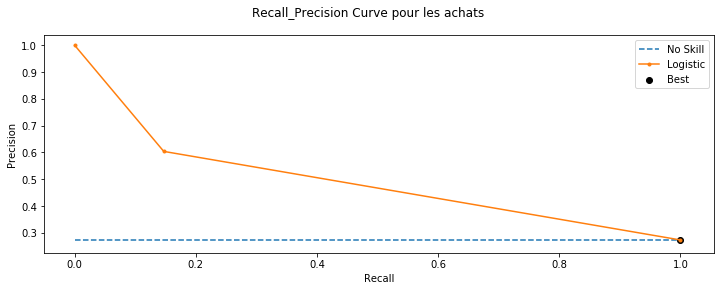

Best Threshold=0.000000, F-Score=0.441


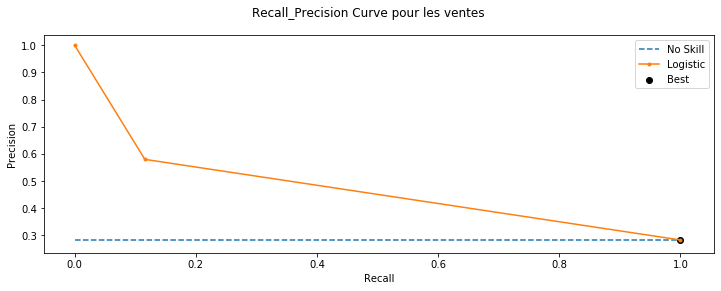

 Bagging K Neigbhors Classifier imbalanced pour  NZD/USD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 23:05:00  0.71792  0.71809  0.71788   0.71806  0.71837  0.71865   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  0.71837   0.71865     15  ...  0.720914  0.718123            0.275642   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0            0.73731         0.677183        0.006869          0.572842   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3651, 1: 795})
Signaux vente avant oversampling Counter({0: 3548, 1: 815})
Signaux achat après oversampling Counter({0: 1600, 1: 593})
Signaux vente après oversampling Counter({0: 1618, 1: 558})
 Achat pour  NZD/USD 

Achat - Accuracy : 74.28 %
Achat - Precision : 66.67 %
Achat - Recall : 9.64 %
Achat - F-measure: : 16.84 % 


              precision    re

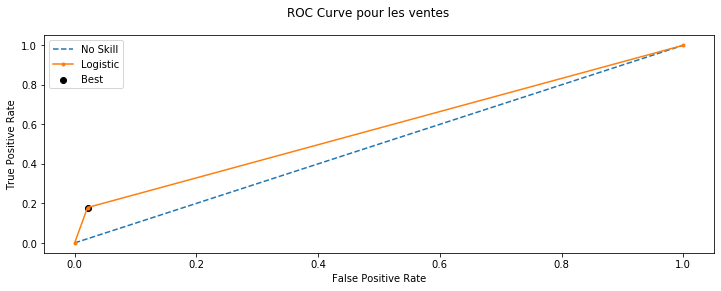

Best Threshold=0.000000, F-Score=0.425


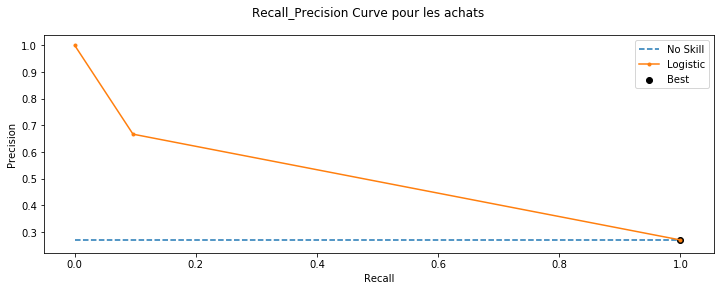

Best Threshold=0.000000, F-Score=0.408


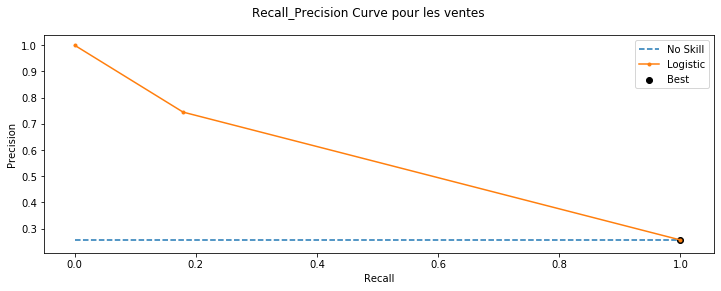

 Bagging K Neigbhors Classifier imbalanced pour  AUD/USD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-08 09:15:00  0.91479   0.9148  0.91405   0.91431  0.91502  0.91502   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  0.91423   0.91451    286  ...  0.912594  0.909711            0.403267   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.748271         0.615992        0.033393          0.520626   

   Signal  BUY  SELL  
0      -1    1     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3701, 1: 760})
Signaux vente avant oversampling Counter({0: 3727, 1: 789})
Signaux achat après oversampling Counter({0: 1685, 1: 617})
Signaux vente après oversampling Counter({0: 1720, 1: 623})
 Achat pour  AUD/USD 

Achat - Accuracy : 77.23 %
Achat - Precision : 73.38 %
Achat - Recall : 23.61 %
Achat - F-measure: : 35.73 % 


              precision    r

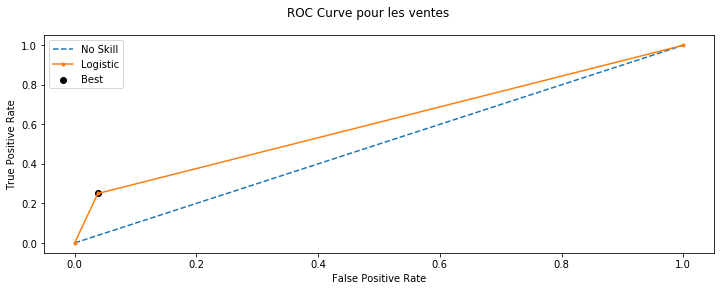

Best Threshold=0.000000, F-Score=0.423


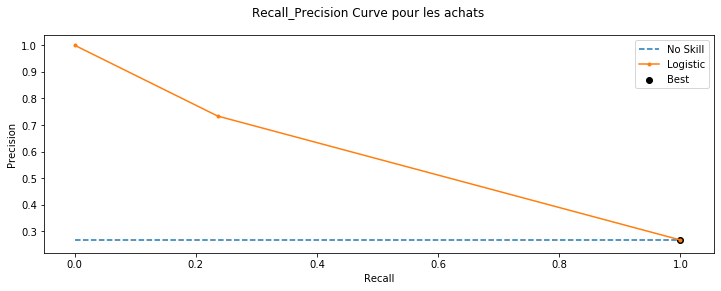

Best Threshold=0.000000, F-Score=0.420


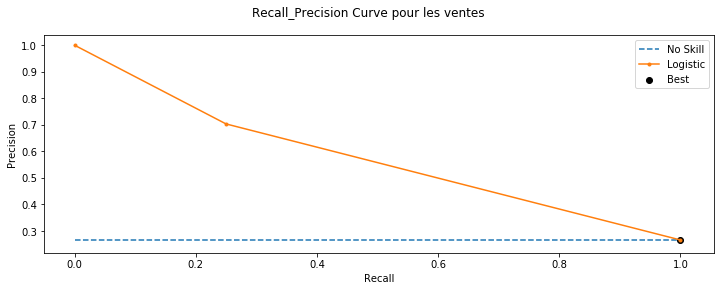

 Bagging K Neigbhors Classifier imbalanced pour  EUR/GBP 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-08 18:35:00  0.82242  0.82253  0.82222   0.82247  0.82265  0.82276   

    LowAsk  CloseAsk  Total  ...    BOLMID   BOLLOW  delta_price_BOLLOW  \
0  0.82244   0.82269    275  ...  0.823728  0.81949            0.137526   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.482956         0.411762        0.008004          0.263519   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3706, 1: 420})
Signaux vente avant oversampling Counter({0: 3714, 1: 380})
Signaux achat après oversampling Counter({0: 2111, 1: 801})
Signaux vente après oversampling Counter({0: 2196, 1: 799})
 Achat pour  EUR/GBP 

Achat - Accuracy : 82.15 %
Achat - Precision : 76.55 %
Achat - Recall : 50.62 %
Achat - F-measure: : 60.94 % 


              precision    rec

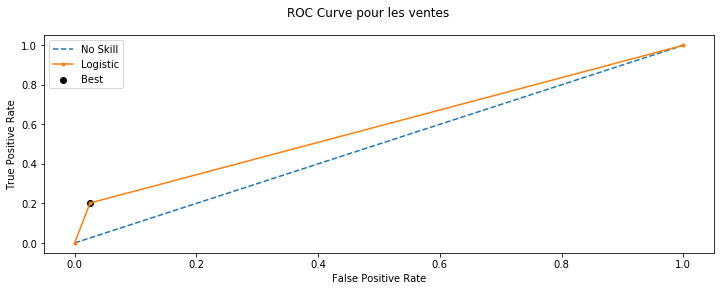

Best Threshold=1.000000, F-Score=0.609


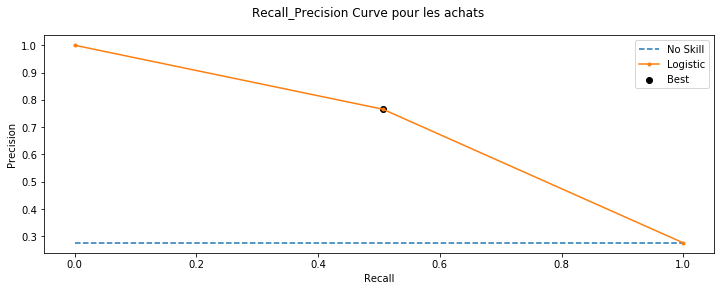

Best Threshold=0.000000, F-Score=0.421


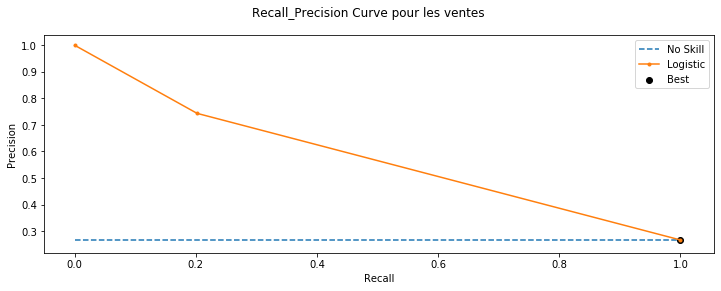

 Bagging K Neigbhors Classifier imbalanced pour  EUR/AUD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 22:20:00  1.39335  1.39347  1.39315   1.39319  1.39391  1.39401   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.39371   1.39378     56  ...  1.396837  1.389135            0.148748   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.691893         0.515313         0.00585          0.360086   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3680, 1: 619})
Signaux vente avant oversampling Counter({0: 3729, 1: 605})
Signaux achat après oversampling Counter({0: 1558, 1: 574})
Signaux vente après oversampling Counter({0: 1609, 1: 525})
 Achat pour  EUR/AUD 

Achat - Accuracy : 79.44 %
Achat - Precision : 70.93 %
Achat - Recall : 40.05 %
Achat - F-measure: : 51.19 % 


              precision    r

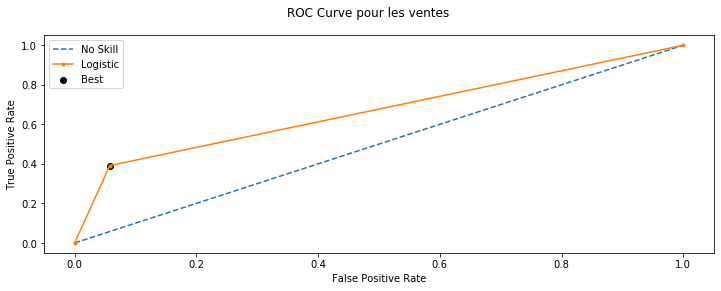

Best Threshold=1.000000, F-Score=0.512


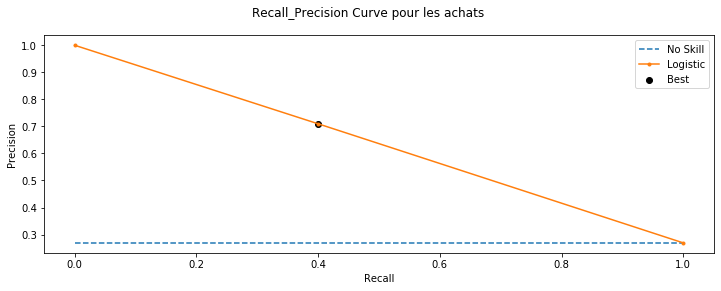

Best Threshold=1.000000, F-Score=0.499


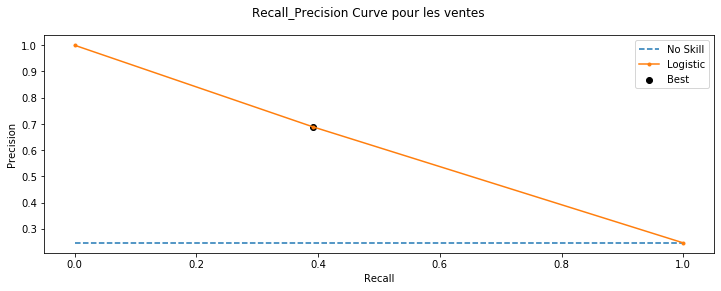

 Bagging K Neigbhors Classifier imbalanced pour  USD/TRY 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-08 07:10:00  1.51137  1.51192  1.51079   1.51139  1.51214  1.51291   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.51194   1.51281    128  ...  1.513534  1.509257            0.140722   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.654483         0.570667        0.002123          0.429642   

   Signal  BUY  SELL  
0       1    1     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 2752, 1: 534})
Signaux vente avant oversampling Counter({0: 2814, 1: 560})
Signaux achat après oversampling Counter({0: 1397, 1: 502})
Signaux vente après oversampling Counter({0: 1445, 1: 535})
 Achat pour  USD/TRY 

Achat - Accuracy : 75.86 %
Achat - Precision : 59.51 %
Achat - Recall : 27.56 %
Achat - F-measure: : 37.67 % 


              precision    r

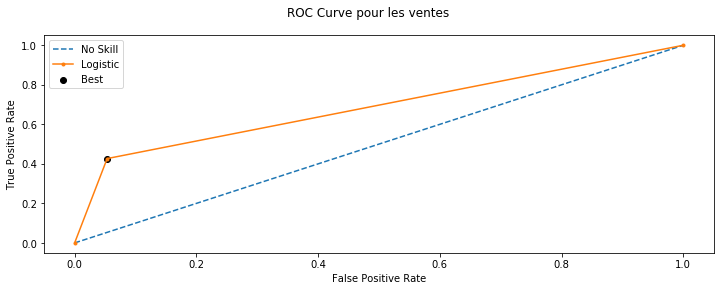

Best Threshold=0.000000, F-Score=0.419


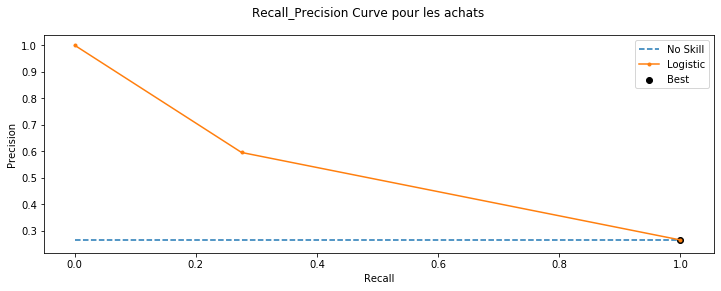

Best Threshold=1.000000, F-Score=0.543


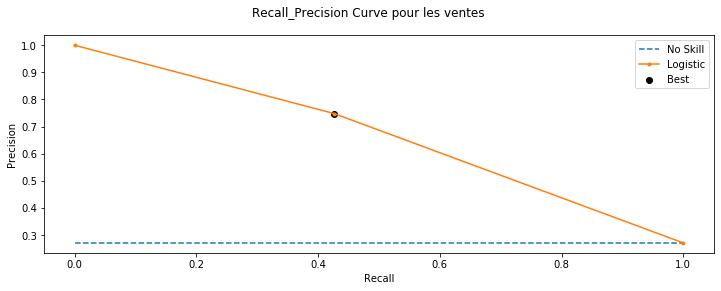

 Bagging K Neigbhors Classifier imbalanced pour  GBP/JPY 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 16:20:00  128.319  128.338  128.215   128.215  128.355  128.374   

    LowAsk  CloseAsk  Total  ...      BOLMID      BOLLOW  delta_price_BOLLOW  \
0  128.247   128.247    202  ...  129.043802  128.011637            0.514227   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0            0.85178         0.757557        0.012086           0.64204   

   Signal  BUY  SELL  
0      -1    1     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3695, 1: 755})
Signaux vente avant oversampling Counter({0: 3694, 1: 779})
Signaux achat après oversampling Counter({0: 1812, 1: 780})
Signaux vente après oversampling Counter({0: 1816, 1: 717})
 Achat pour  GBP/JPY 

Achat - Accuracy : 78.35 %
Achat - Precision : 73.11 %
Achat - Recall : 44.32 %
Achat - F-measure: : 55.19 % 


              precis

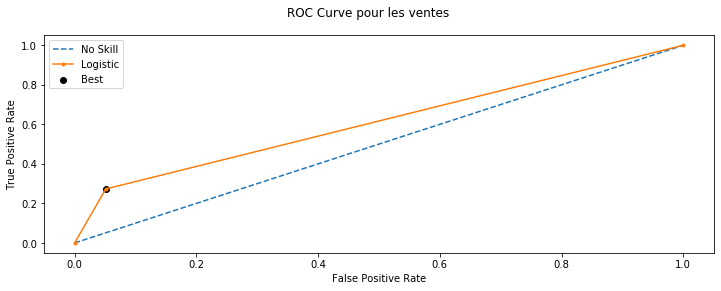

Best Threshold=1.000000, F-Score=0.552


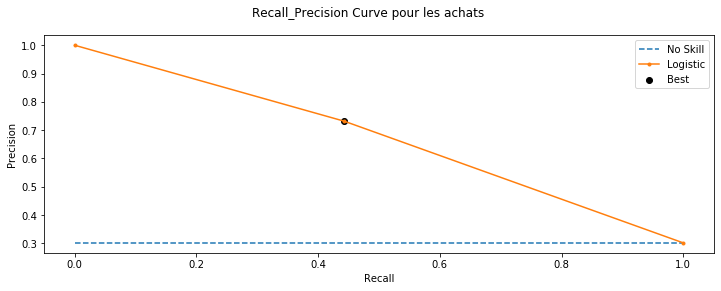

Best Threshold=0.000000, F-Score=0.441


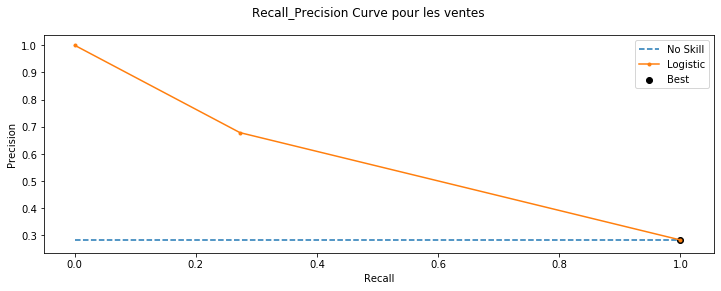

 Bagging K Neigbhors Classifier imbalanced pour  GBP/NZD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 15:00:00  2.12119  2.12412  2.12118   2.12358  2.12243  2.12508   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  2.12241   2.12469    319  ...  2.128118  2.120266            0.269365   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.612755         0.651963        0.027817          0.508486   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3750, 1: 769})
Signaux vente avant oversampling Counter({0: 3645, 1: 757})
Signaux achat après oversampling Counter({0: 1864, 1: 608})
Signaux vente après oversampling Counter({0: 1749, 1: 576})
 Achat pour  GBP/NZD 

Achat - Accuracy : 75.27 %
Achat - Precision : 48.96 %
Achat - Recall : 11.03 %
Achat - F-measure: : 18.01 % 


              precision    r

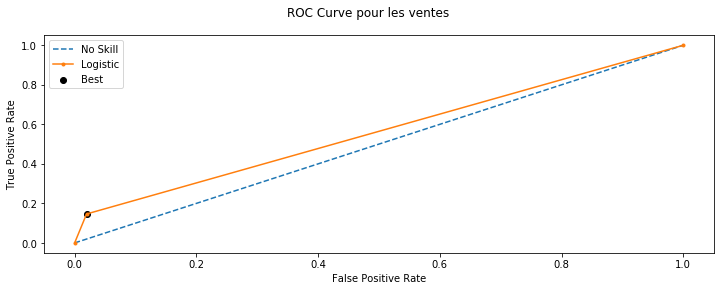

Best Threshold=0.000000, F-Score=0.395


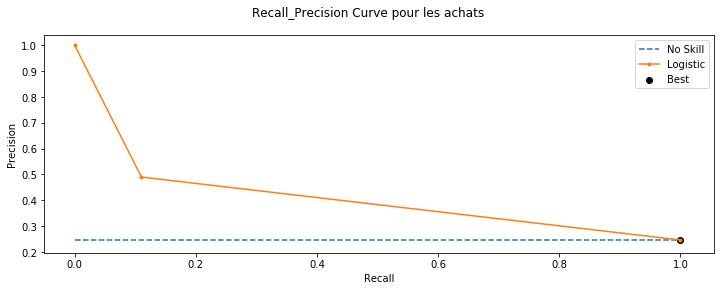

Best Threshold=0.000000, F-Score=0.397


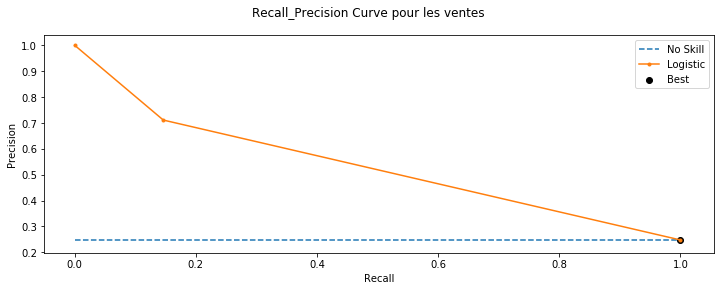

 Bagging K Neigbhors Classifier imbalanced pour  USD/HKD 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-14 22:20:00  7.76502  7.76502   7.765   7.76502  7.76678  7.76678   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  7.76661   7.76661      2  ...  7.766136  7.764669            0.359861   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.831586         0.723567        0.000962          0.625462   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 2230})
Signaux vente avant oversampling Counter({0: 2194})
 Not enough populated for  USD/HKD 
 Bagging K Neigbhors Classifier imbalanced pour  EUR/NOK 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-08 15:45:00   7.8828   7.8842   7.881    7.8813   7.8898   7.8898   

   LowAsk  CloseAsk  Total  ...    BOLMID  

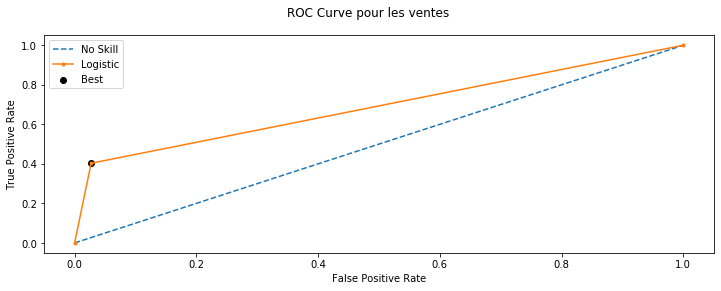

Best Threshold=0.000000, F-Score=0.451


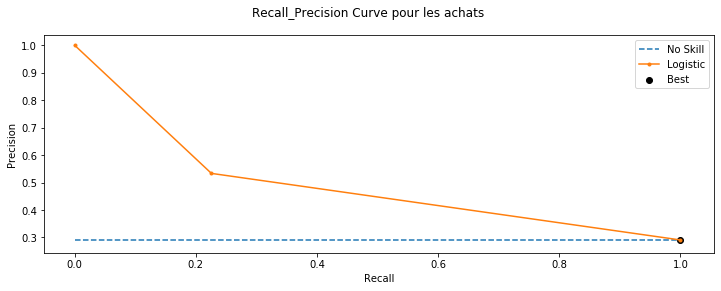

Best Threshold=1.000000, F-Score=0.547


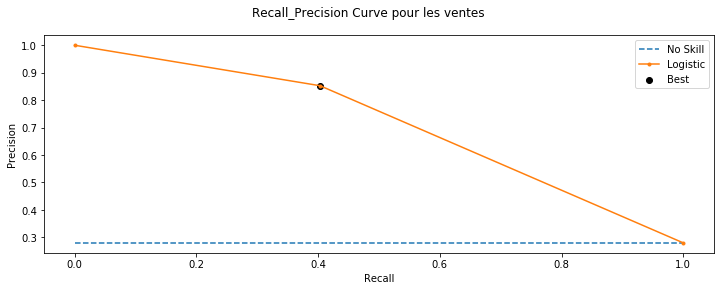

 Bagging K Neigbhors Classifier imbalanced pour  AUD/CAD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 14:55:00  0.95543  0.95543  0.95379   0.95408  0.95583  0.95583   

    LowAsk  CloseAsk  Total  ...    BOLMID   BOLLOW  delta_price_BOLLOW  \
0  0.95419   0.95447    538  ...  0.949026  0.94576            0.397228   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.865255         0.587997        0.079074          0.498765   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3637, 1: 394})
Signaux vente avant oversampling Counter({0: 3810, 1: 447})
Signaux achat après oversampling Counter({0: 2146, 1: 656})
Signaux vente après oversampling Counter({0: 2190, 1: 783})
 Achat pour  AUD/CAD 

Achat - Accuracy : 78.34 %
Achat - Precision : 80.36 %
Achat - Recall : 9.8 %
Achat - F-measure: : 17.48 % 


              precision    recal

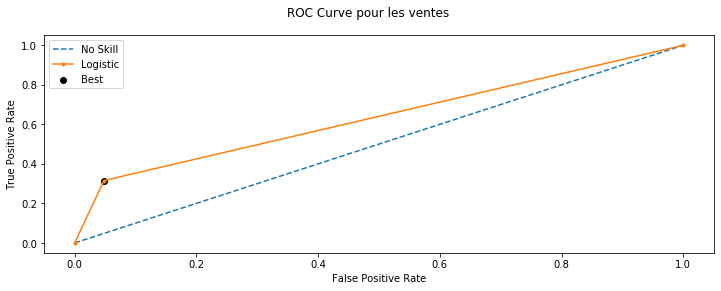

Best Threshold=0.000000, F-Score=0.379


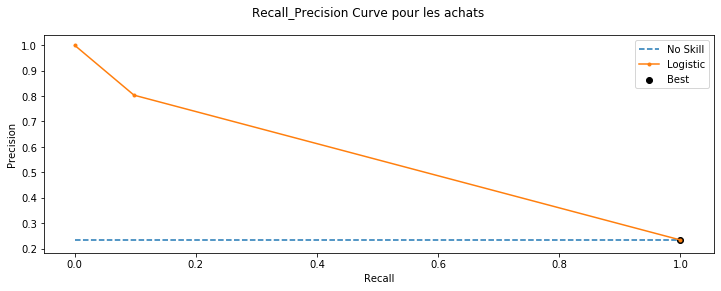

Best Threshold=1.000000, F-Score=0.435


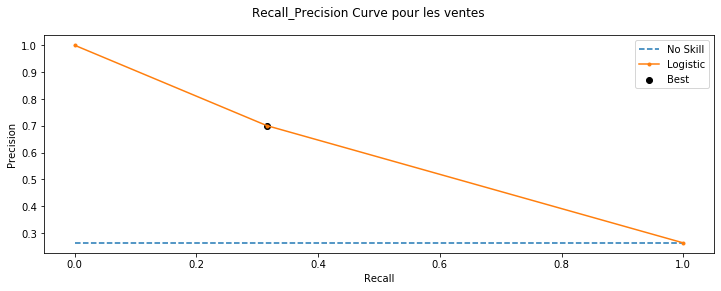

 Bagging K Neigbhors Classifier imbalanced pour  EUR/SEK 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 18:30:00   9.3015   9.3031  9.3011    9.3019   9.3068   9.3089   

   LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  9.3052    9.3063     32  ...  9.304129  9.283792            0.241252   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.590938         0.568376        0.013051          0.382621   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3149, 1: 312})
Signaux vente avant oversampling Counter({0: 3104, 1: 273})
Signaux achat après oversampling Counter({0: 1698, 1: 756})
Signaux vente après oversampling Counter({0: 1746, 1: 699})
 Achat pour  EUR/SEK 

Achat - Accuracy : 77.82 %
Achat - Precision : 76.43 %
Achat - Recall : 40.45 %
Achat - F-measure: : 52.9 % 


              precision    recall

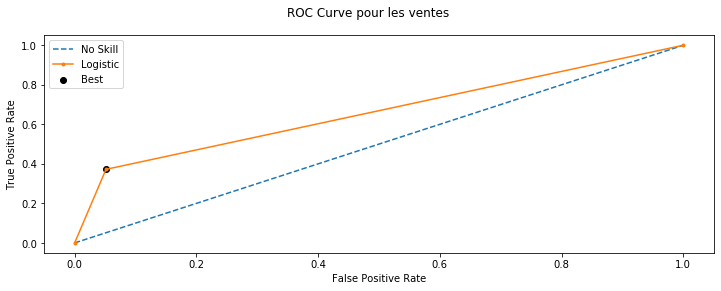

Best Threshold=1.000000, F-Score=0.529


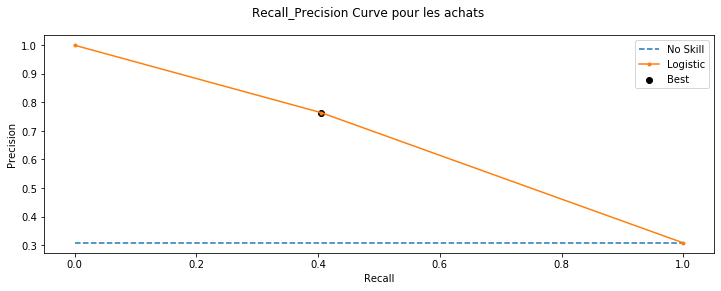

Best Threshold=1.000000, F-Score=0.496


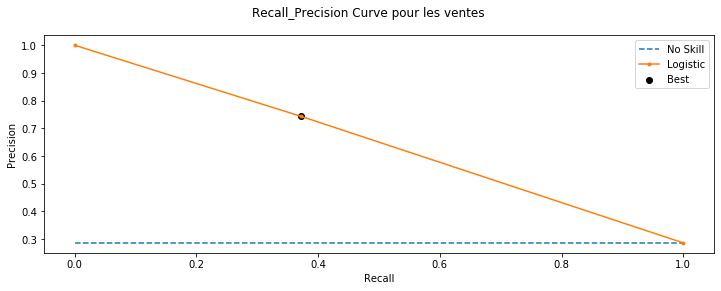

 Bagging K Neigbhors Classifier imbalanced pour  USD/SEK 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 16:10:00  7.31241  7.31424  7.31132   7.31189   7.3158   7.3181   

   LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  7.3152   7.31629    143  ...  7.270027  7.203843            0.261038   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.561143         0.645573        0.017496          0.531991   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3617, 1: 671})
Signaux vente avant oversampling Counter({0: 3819, 1: 701})
Signaux achat après oversampling Counter({0: 1943, 1: 782})
Signaux vente après oversampling Counter({0: 1927, 1: 736})
 Achat pour  USD/SEK 

Achat - Accuracy : 73.9 %
Achat - Precision : 63.44 %
Achat - Recall : 21.53 %
Achat - F-measure: : 32.15 % 


              precision    reca

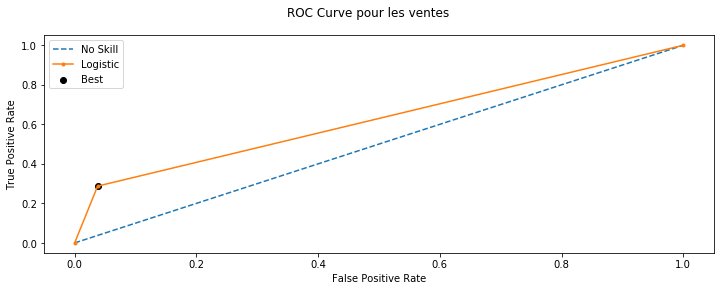

Best Threshold=0.000000, F-Score=0.446


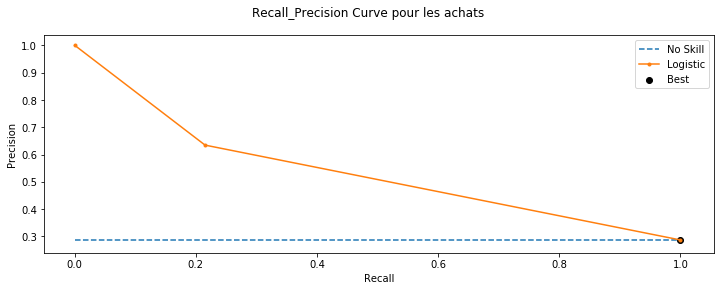

Best Threshold=0.000000, F-Score=0.433


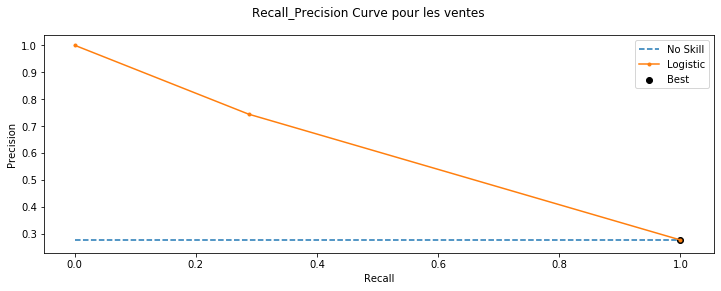

 Bagging K Neigbhors Classifier imbalanced pour  NZD/CHF 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 16:20:00  0.72964  0.72978  0.72933   0.72937  0.73034   0.7304   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  0.73003   0.73003     74  ...  0.729705  0.727231            0.503102   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.782152         0.806553        0.005411          0.711081   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3772, 1: 511})
Signaux vente avant oversampling Counter({0: 3716, 1: 532})
Signaux achat après oversampling Counter({0: 2238, 1: 753})
Signaux vente après oversampling Counter({0: 2036, 1: 754})
 Achat pour  NZD/CHF 

Achat - Accuracy : 77.36 %
Achat - Precision : 77.32 %
Achat - Recall : 14.23 %
Achat - F-measure: : 24.04 % 


              precision    r

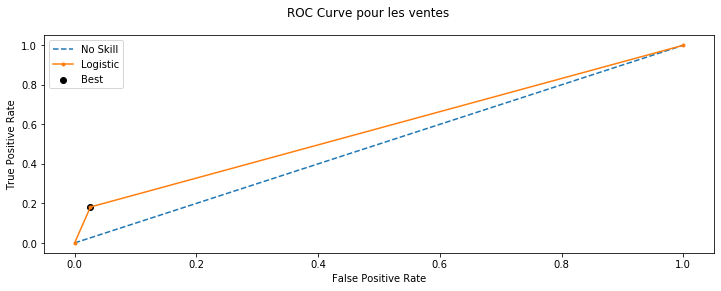

Best Threshold=0.000000, F-Score=0.402


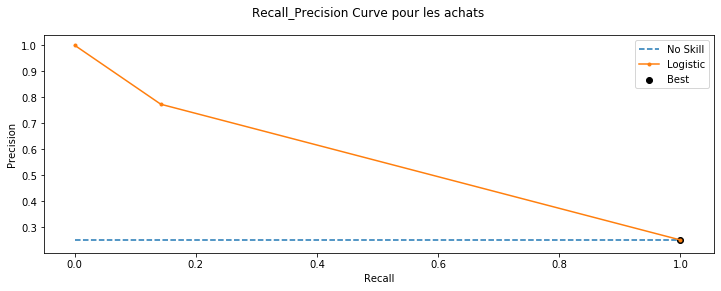

Best Threshold=0.000000, F-Score=0.426


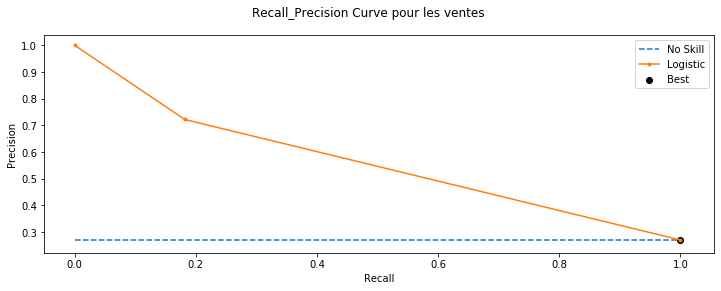

 Bagging K Neigbhors Classifier imbalanced pour  AUD/CHF 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 15:05:00  0.92331  0.92349  0.92279   0.92308  0.92374  0.92387   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  0.92321   0.92341    394  ...  0.924191  0.919559            0.456623   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.748118         0.784274        0.007464          0.689333   

   Signal  BUY  SELL  
0      -1    1     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3653, 1: 572})
Signaux vente avant oversampling Counter({0: 3615, 1: 637})
Signaux achat après oversampling Counter({0: 1893, 1: 604})
Signaux vente après oversampling Counter({0: 1703, 1: 520})
 Achat pour  AUD/CHF 

Achat - Accuracy : 80.21 %
Achat - Precision : 70.16 %
Achat - Recall : 31.68 %
Achat - F-measure: : 43.65 % 


              precision    r

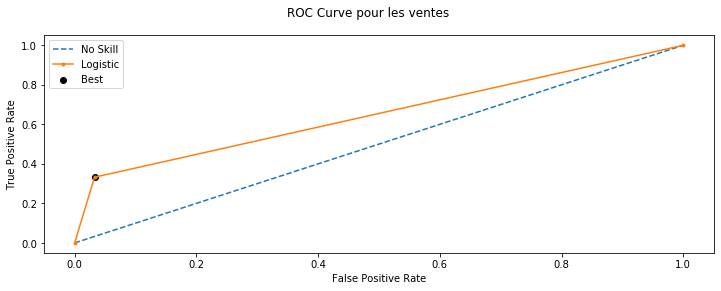

Best Threshold=1.000000, F-Score=0.436


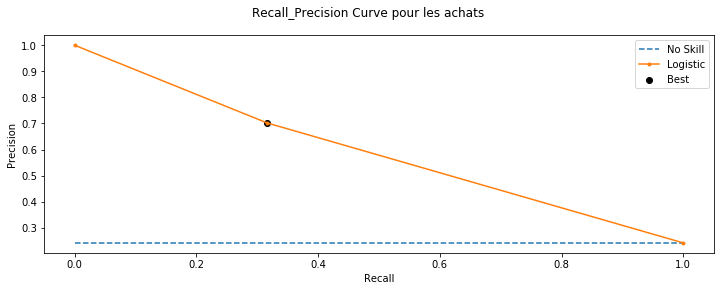

Best Threshold=1.000000, F-Score=0.462


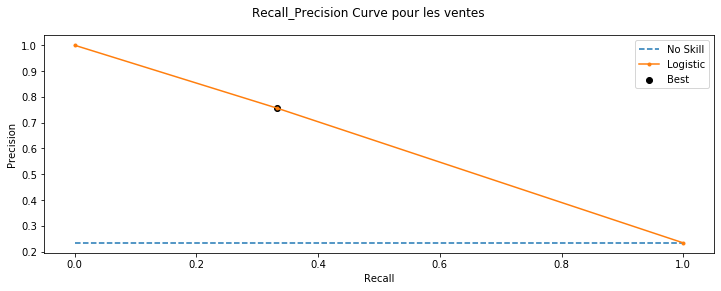

 Bagging K Neigbhors Classifier imbalanced pour  EUR/JPY 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 19:15:00  106.327  106.369  106.313   106.361  106.351  106.392   

    LowAsk  CloseAsk  Total  ...      BOLMID      BOLLOW  delta_price_BOLLOW  \
0  106.337   106.384    222  ...  107.192746  106.037519             0.47867   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.723615         0.707465        0.009472           0.56911   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3636, 1: 718})
Signaux vente avant oversampling Counter({0: 3758, 1: 753})
Signaux achat après oversampling Counter({0: 1821, 1: 789})
Signaux vente après oversampling Counter({0: 1878, 1: 858})
 Achat pour  EUR/JPY 

Achat - Accuracy : 77.45 %
Achat - Precision : 75.55 %
Achat - Recall : 37.5 %
Achat - F-measure: : 50.12 % 


              precisi

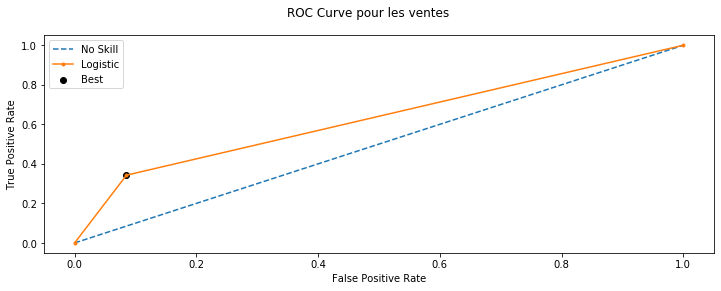

Best Threshold=1.000000, F-Score=0.501


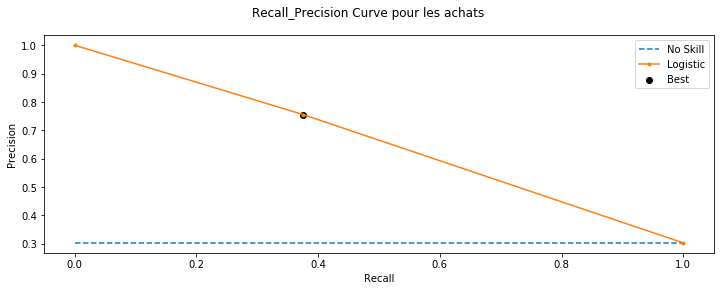

Best Threshold=0.000000, F-Score=0.478


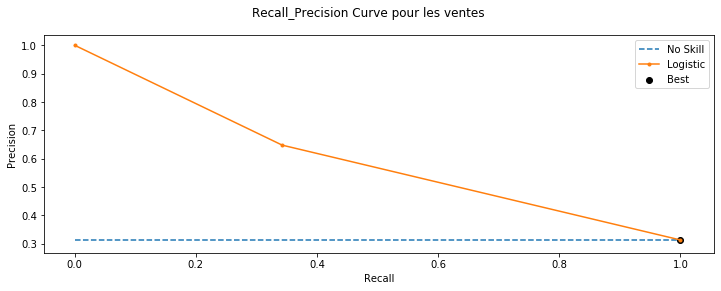

 Bagging K Neigbhors Classifier imbalanced pour  CAD/JPY 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 19:10:00   79.985   80.015   79.97     79.99   80.019   80.047   

   LowAsk  CloseAsk  Total  ...     BOLMID     BOLLOW  delta_price_BOLLOW  \
0  80.007    80.029     99  ...  80.661246  79.772453            0.421414   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.659219         0.678752        0.012081          0.541002   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3573, 1: 710})
Signaux vente avant oversampling Counter({0: 3752, 1: 811})
Signaux achat après oversampling Counter({0: 1799, 1: 757})
Signaux vente après oversampling Counter({0: 1787, 1: 690})
 Achat pour  CAD/JPY 

Achat - Accuracy : 75.31 %
Achat - Precision : 69.64 %
Achat - Recall : 29.43 %
Achat - F-measure: : 41.38 % 


              precision    r

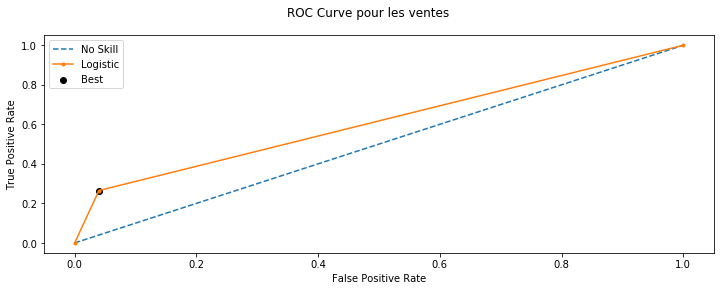

Best Threshold=0.000000, F-Score=0.457


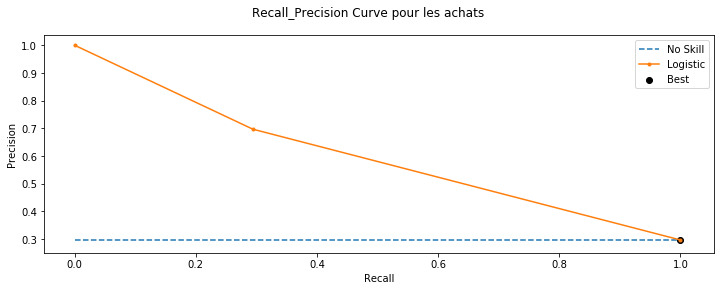

Best Threshold=0.000000, F-Score=0.436


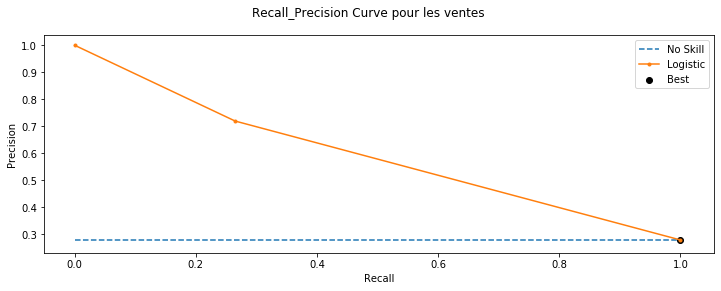

 Bagging K Neigbhors Classifier imbalanced pour  EUR/CAD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 18:45:00  1.32889   1.3291  1.32862   1.32868  1.32932   1.3295   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.32896   1.32906    252  ...  1.328678  1.325017              0.2115   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0            0.65999         0.572304        0.014898          0.441924   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3843, 1: 567})
Signaux vente avant oversampling Counter({0: 3735, 1: 498})
Signaux achat après oversampling Counter({0: 1962, 1: 659})
Signaux vente après oversampling Counter({0: 1922, 1: 685})
 Achat pour  EUR/CAD 

Achat - Accuracy : 79.4 %
Achat - Precision : 67.97 %
Achat - Recall : 34.06 %
Achat - F-measure: : 45.38 % 


              precision    re

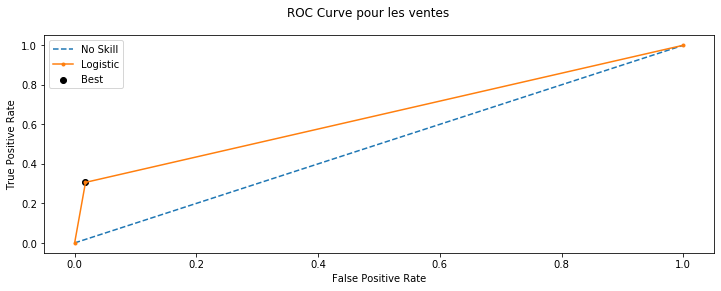

Best Threshold=1.000000, F-Score=0.454


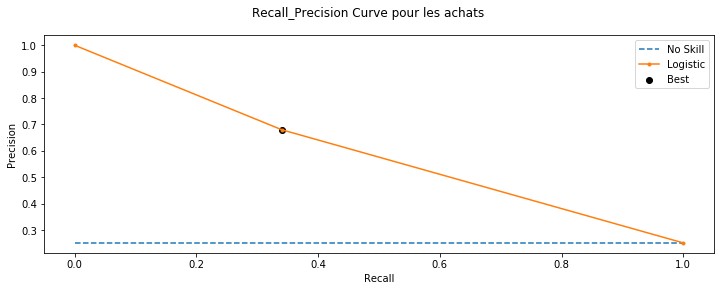

Best Threshold=1.000000, F-Score=0.452


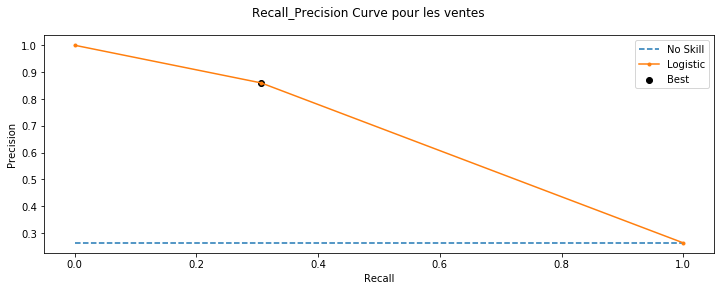

 Bagging K Neigbhors Classifier imbalanced pour  USD/ZAR 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-08 09:15:00   7.2913   7.2913  7.2804    7.2804   7.2968   7.2968   

   LowAsk  CloseAsk  Total  ...   BOLMID    BOLLOW  delta_price_BOLLOW  \
0  7.2859    7.2859    115  ...  7.26789  7.247842            0.122435   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.452376         0.565196        0.008656          0.405272   

   Signal  BUY  SELL  
0      -1    0     1  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 2818, 1: 840})
Signaux vente avant oversampling Counter({0: 2914, 1: 820})
Signaux achat après oversampling Counter({0: 1174, 1: 412})
Signaux vente après oversampling Counter({0: 1330, 1: 452})
 Achat pour  USD/ZAR 

Achat - Accuracy : 78.13 %
Achat - Precision : 71.3 %
Achat - Recall : 26.64 %
Achat - F-measure: : 38.79 % 


              precision    recall  

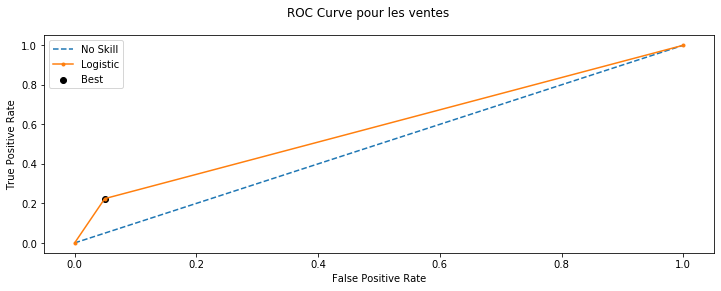

Best Threshold=0.000000, F-Score=0.413


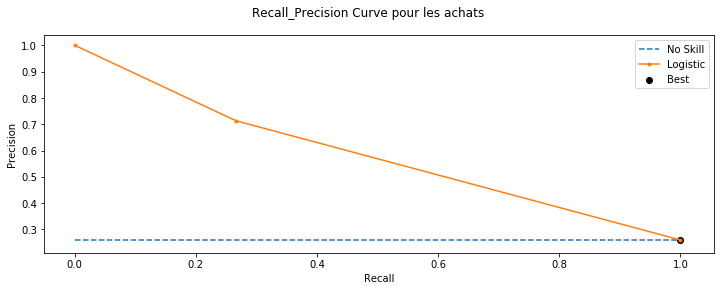

Best Threshold=0.000000, F-Score=0.405


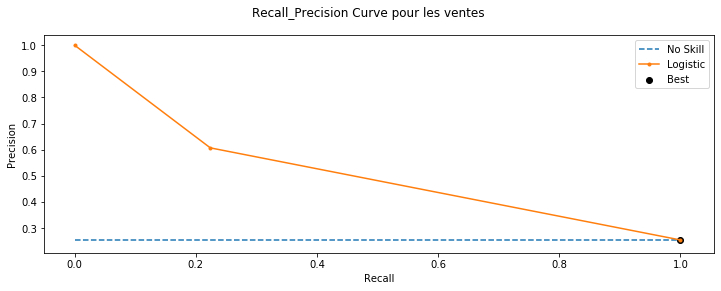

 Bagging K Neigbhors Classifier imbalanced pour  USD/JPY 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 16:35:00   83.683   83.718  83.683    83.718   83.699    83.73   

   LowAsk  CloseAsk  Total  ...     BOLMID     BOLLOW  delta_price_BOLLOW  \
0  83.698     83.73    133  ...  83.981091  83.575529            0.388176   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.705265         0.716619        0.007429          0.583382   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3571, 1: 537})
Signaux vente avant oversampling Counter({0: 3807, 1: 603})
Signaux achat après oversampling Counter({0: 1933, 1: 844})
Signaux vente après oversampling Counter({0: 2060, 1: 874})
 Achat pour  USD/JPY 

Achat - Accuracy : 79.42 %
Achat - Precision : 81.11 %
Achat - Recall : 42.13 %
Achat - F-measure: : 55.46 % 


              precision    r

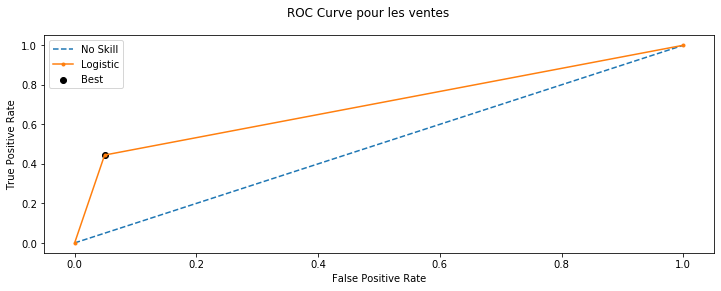

Best Threshold=1.000000, F-Score=0.555


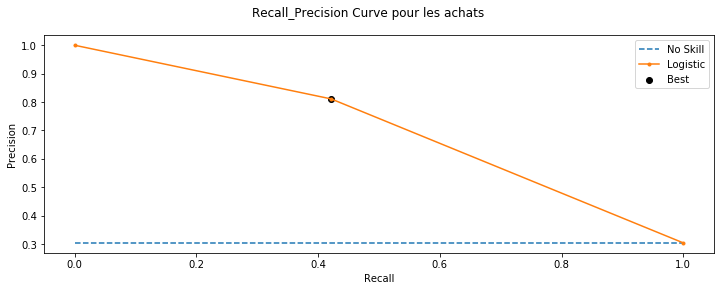

Best Threshold=1.000000, F-Score=0.570


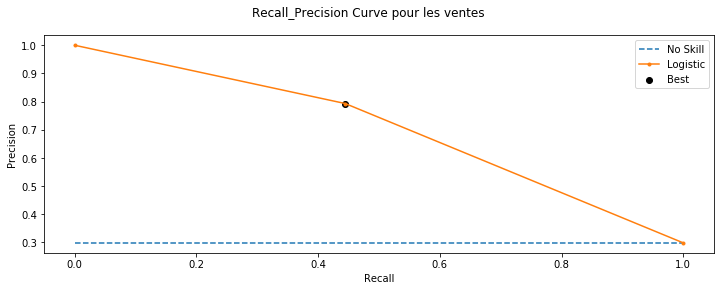

 Bagging K Neigbhors Classifier imbalanced pour  GBP/CHF 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 16:00:00  1.54875  1.54948  1.5486   1.54941  1.54919  1.54983   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.54914   1.54979    241  ...  1.553723  1.546876            0.519084   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.786434         0.812647        0.005278          0.726188   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3567, 1: 486})
Signaux vente avant oversampling Counter({0: 3702, 1: 545})
Signaux achat après oversampling Counter({0: 1863, 1: 668})
Signaux vente après oversampling Counter({0: 1936, 1: 656})
 Achat pour  GBP/CHF 

Achat - Accuracy : 83.69 %
Achat - Precision : 74.93 %
Achat - Recall : 57.48 %
Achat - F-measure: : 65.05 % 


              precision    rec

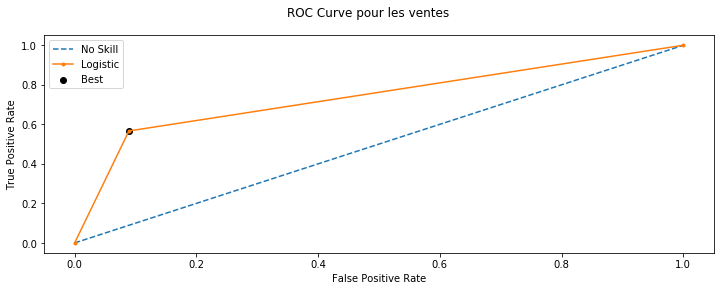

Best Threshold=1.000000, F-Score=0.651


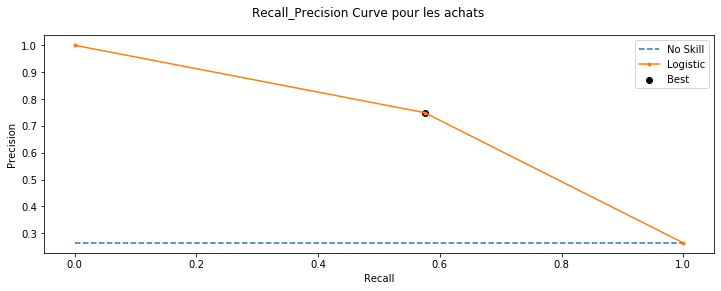

Best Threshold=1.000000, F-Score=0.619


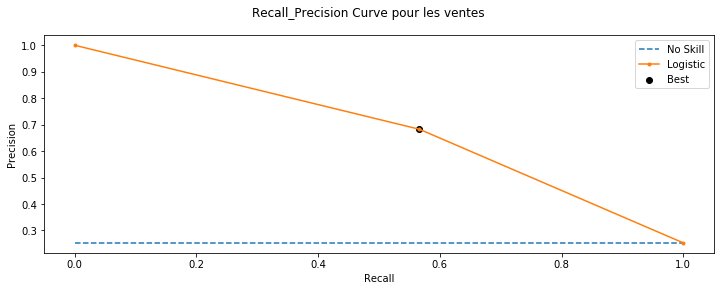

 Bagging K Neigbhors Classifier imbalanced pour  NZD/JPY 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 16:55:00   60.418   60.418  60.386    60.412   60.448   60.448   

   LowAsk  CloseAsk  Total  ...     BOLMID     BOLLOW  delta_price_BOLLOW  \
0  60.417    60.439    111  ...  60.608036  60.182389            0.477074   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0            0.78189         0.773418        0.006557          0.660595   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3544, 1: 884})
Signaux vente avant oversampling Counter({0: 3759, 1: 974})
Signaux achat après oversampling Counter({0: 1649, 1: 648})
Signaux vente après oversampling Counter({0: 1718, 1: 639})
 Achat pour  NZD/JPY 

Achat - Accuracy : 76.49 %
Achat - Precision : 70.65 %
Achat - Recall : 28.63 %
Achat - F-measure: : 40.75 % 


              precision    r

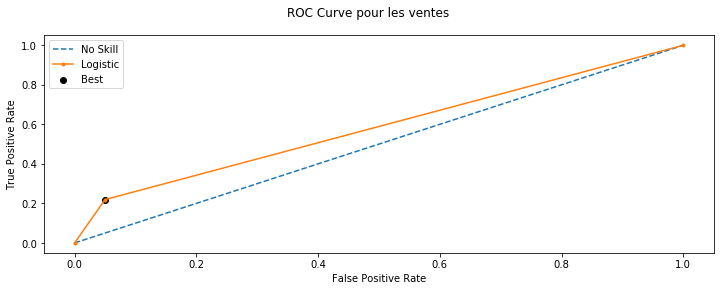

Best Threshold=0.000000, F-Score=0.440


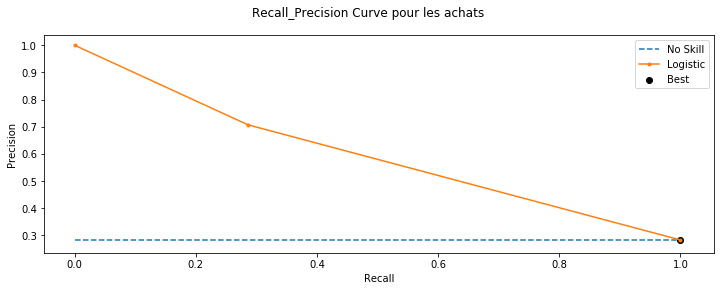

Best Threshold=0.000000, F-Score=0.426


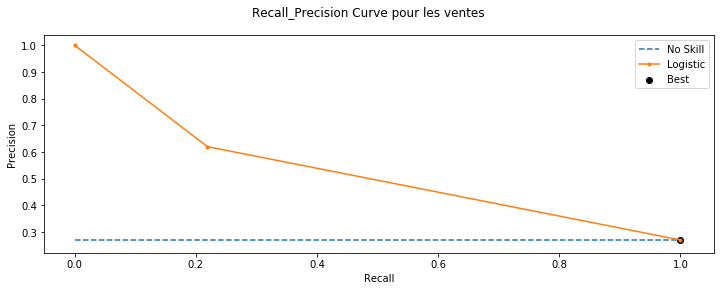

 Bagging K Neigbhors Classifier imbalanced pour  GBP/CAD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 15:55:00  1.59661  1.59723  1.59623    1.5966  1.59714  1.59769   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.59672   1.59703    264  ...  1.596027  1.590123            0.558408   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.879995         0.747401        0.013941          0.661783   

   Signal  BUY  SELL  
0       1    1     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3805, 1: 510})
Signaux vente avant oversampling Counter({0: 3697, 1: 513})
Signaux achat après oversampling Counter({0: 2020, 1: 795})
Signaux vente après oversampling Counter({0: 1971, 1: 750})
 Achat pour  GBP/CAD 

Achat - Accuracy : 81.74 %
Achat - Precision : 74.56 %
Achat - Recall : 53.68 %
Achat - F-measure: : 62.42 % 


              precision    r

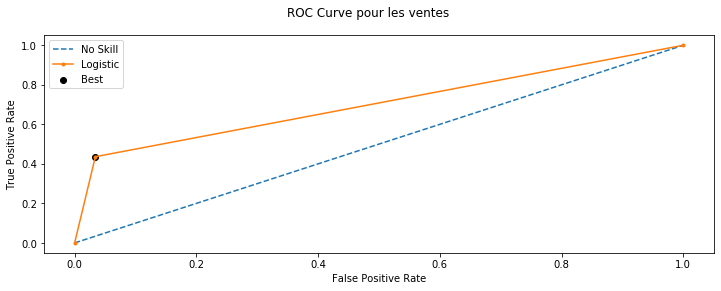

Best Threshold=1.000000, F-Score=0.624


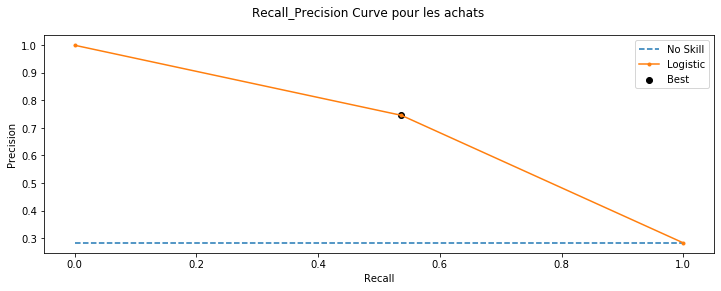

Best Threshold=1.000000, F-Score=0.572


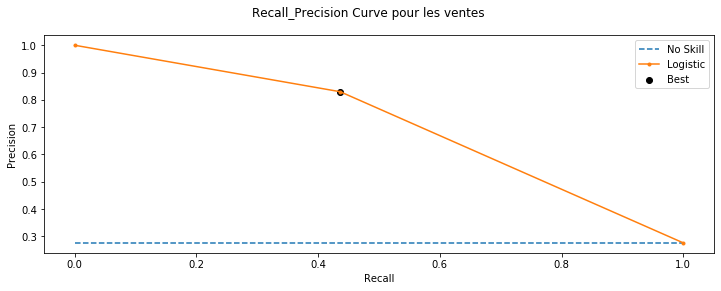

 Bagging K Neigbhors Classifier imbalanced pour  EUR/CHF 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 18:05:00  1.28606   1.2861   1.285   1.28534  1.28639  1.28644   

   LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.2853   1.28563    273  ...  1.292323  1.283817             0.46112   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.744817         0.772797        0.007981          0.675564   

   Signal  BUY  SELL  
0      -1    0     1  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3562, 1: 213})
Signaux vente avant oversampling Counter({0: 3465, 1: 225})
Signaux achat après oversampling Counter({0: 2053, 1: 713})
Signaux vente après oversampling Counter({0: 2084, 1: 641})
 Achat pour  EUR/CHF 

Achat - Accuracy : 85.08 %
Achat - Precision : 81.82 %
Achat - Recall : 54.11 %
Achat - F-measure: : 65.14 % 


              precision    recal

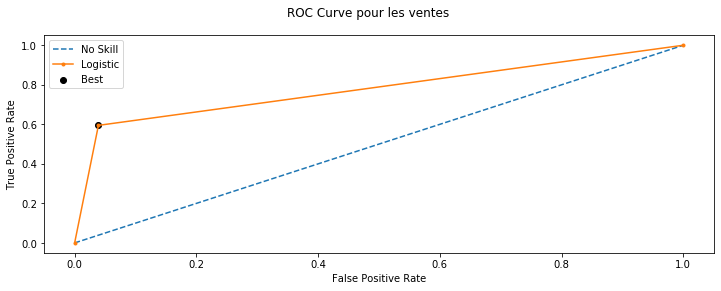

Best Threshold=1.000000, F-Score=0.651


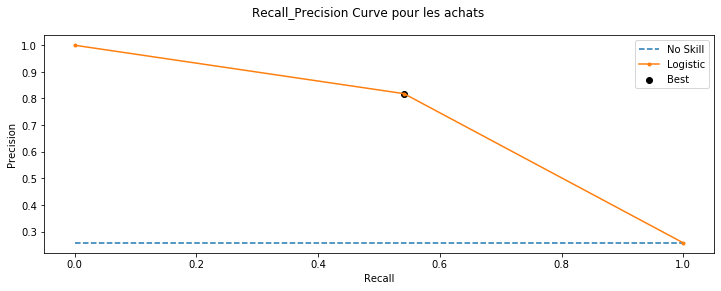

Best Threshold=1.000000, F-Score=0.691


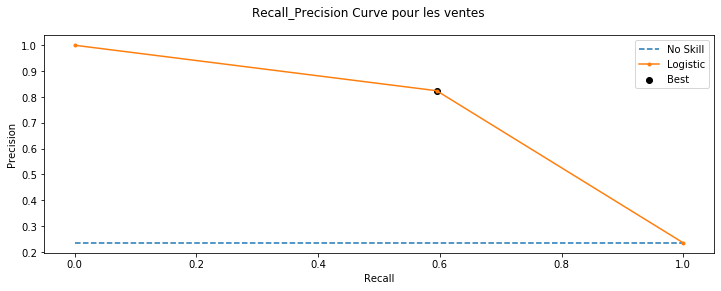

 Bagging K Neigbhors Classifier imbalanced pour  AUD/NZD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-08 18:25:00  1.27178  1.27199  1.27062   1.27073  1.27238  1.27245   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.27133    1.2714    129  ...  1.271132  1.267087            0.404492   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.597388         0.659437        0.037866          0.549349   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3694, 1: 277})
Signaux vente avant oversampling Counter({0: 3755, 1: 266})
Signaux achat après oversampling Counter({0: 1985, 1: 807})
Signaux vente après oversampling Counter({0: 2027, 1: 873})
 Achat pour  AUD/NZD 

Achat - Accuracy : 80.41 %
Achat - Precision : 74.59 %
Achat - Recall : 48.85 %
Achat - F-measure: : 59.04 % 


              precision    r

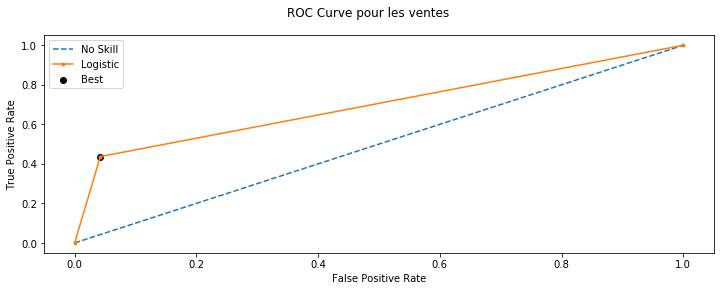

Best Threshold=1.000000, F-Score=0.590


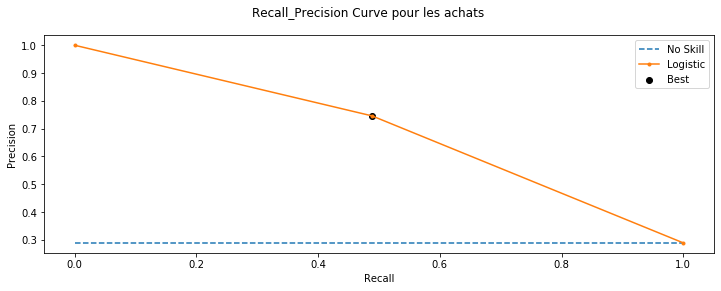

Best Threshold=1.000000, F-Score=0.569


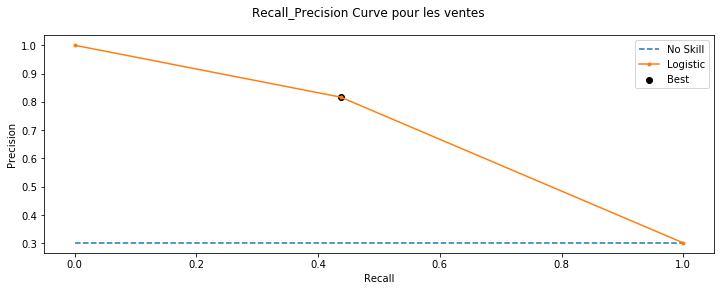

 Bagging K Neigbhors Classifier imbalanced pour  GBP/AUD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 17:15:00  1.67899  1.67916  1.67857   1.67861  1.67945  1.67961   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.67909   1.67914    186  ...  1.680869  1.672866            0.464838   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.771342         0.759833        0.008059           0.65608   

   Signal  BUY  SELL  
0      -1    1     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3698, 1: 730})
Signaux vente avant oversampling Counter({0: 3570, 1: 642})
Signaux achat après oversampling Counter({0: 1610, 1: 598})
Signaux vente après oversampling Counter({0: 1530, 1: 554})
 Achat pour  GBP/AUD 

Achat - Accuracy : 76.52 %
Achat - Precision : 62.73 %
Achat - Recall : 32.94 %
Achat - F-measure: : 43.19 % 


              precision    r

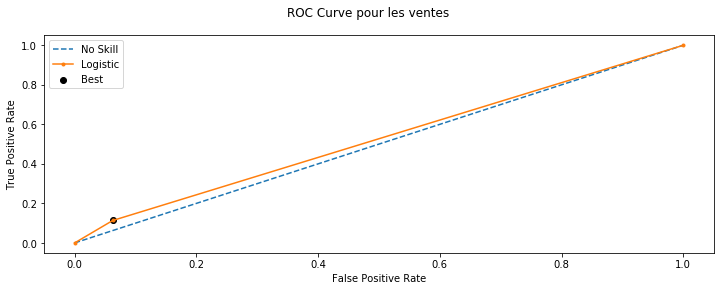

Best Threshold=1.000000, F-Score=0.432


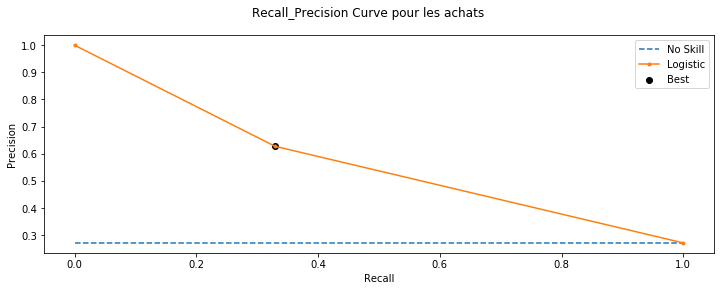

Best Threshold=0.000000, F-Score=0.420


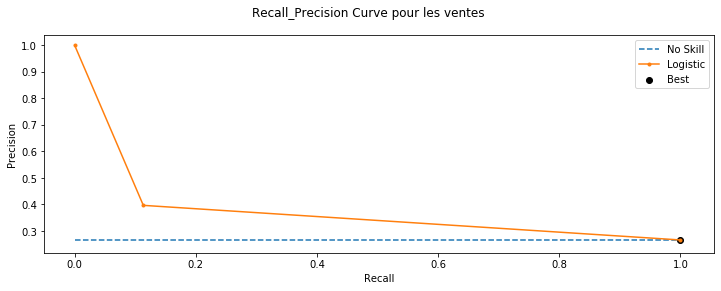

 Bagging K Neigbhors Classifier imbalanced pour  USD/MXN 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 19:20:00  13.0603  13.0605  13.0583   13.0602  13.0654  13.0692   

   LowAsk  CloseAsk  Total  ...    BOLMID     BOLLOW  delta_price_BOLLOW  \
0  13.064   13.0659     47  ...  12.99833  12.899787             0.18047   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.589203         0.435981        0.002209          0.309793   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3295, 1: 798})
Signaux vente avant oversampling Counter({0: 3247, 1: 750})
Signaux achat après oversampling Counter({0: 1575, 1: 573})
Signaux vente après oversampling Counter({0: 1603, 1: 661})
 Achat pour  USD/MXN 

Achat - Accuracy : 81.38 %
Achat - Precision : 71.68 %
Achat - Recall : 49.88 %
Achat - F-measure: : 58.82 % 


              precision    r

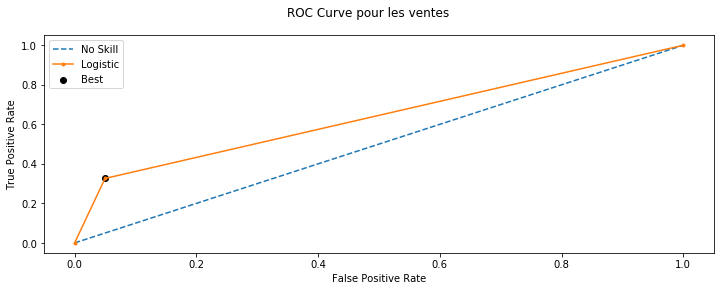

Best Threshold=1.000000, F-Score=0.588


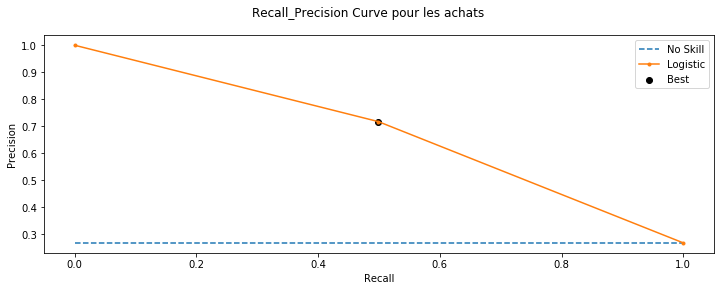

Best Threshold=0.000000, F-Score=0.452


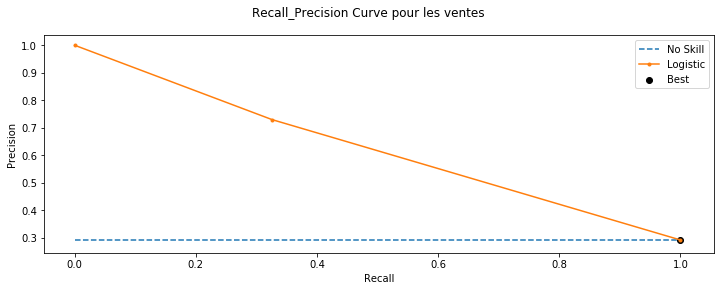

 Bagging K Neigbhors Classifier imbalanced pour  CAD/CHF 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 15:45:00  0.96999  0.97022  0.96957   0.97021  0.97052  0.97072   

   LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  0.9701   0.97072    205  ...  0.973225  0.967136            0.461738   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.752856         0.762775        0.008161          0.657082   

   Signal  BUY  SELL  
0      -1    0     1  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3735, 1: 423})
Signaux vente avant oversampling Counter({0: 3703, 1: 438})
Signaux achat après oversampling Counter({0: 2056, 1: 676})
Signaux vente après oversampling Counter({0: 2057, 1: 729})
 Achat pour  CAD/CHF 

Achat - Accuracy : 78.67 %
Achat - Precision : 88.24 %
Achat - Recall : 15.86 %
Achat - F-measure: : 26.88 % 


              precision    rec

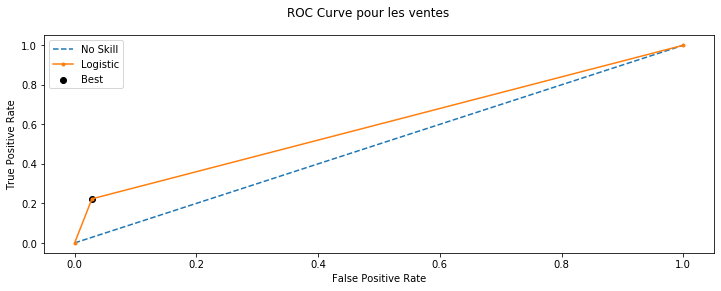

Best Threshold=0.000000, F-Score=0.396


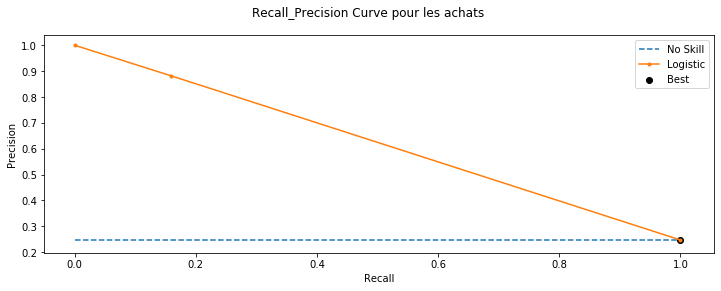

Best Threshold=0.000000, F-Score=0.415


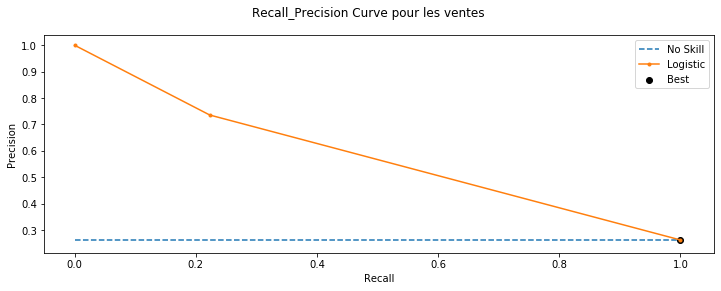

 Bagging K Neigbhors Classifier imbalanced pour  USD/CNH 
DF
                  Date  OpenBid  HighBid  LowBid  CloseBid  OpenAsk  HighAsk  \
0  2012-02-21 05:00:00   6.2987   6.2999  6.2984    6.2997   6.3007   6.3007   

   LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  6.3005    6.3005     23  ...  6.294632  6.290092            0.235515   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.634057          0.43052        0.009181          0.299587   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 2840, 1: 38})
Signaux vente avant oversampling Counter({0: 2858, 1: 56})
Signaux achat après oversampling Counter({0: 1832, 1: 836})
Signaux vente après oversampling Counter({0: 1878, 1: 831})
 Achat pour  USD/CNH 

Achat - Accuracy : 93.09 %
Achat - Precision : 93.85 %
Achat - Recall : 83.42 %
Achat - F-measure: : 88.33 % 


              precision    recall 

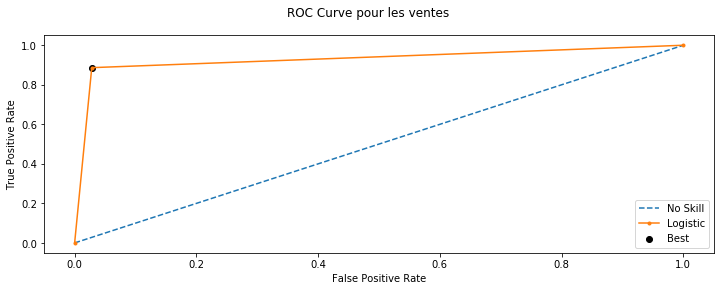

Best Threshold=1.000000, F-Score=0.883


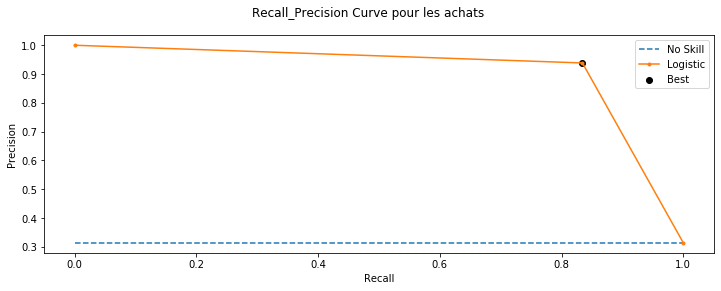

Best Threshold=1.000000, F-Score=0.909


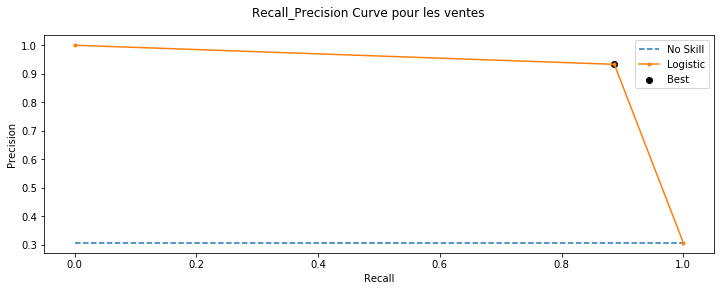

 Bagging K Neigbhors Classifier imbalanced pour  EUR/USD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 16:10:00  1.27205  1.27218  1.27169   1.27207  1.27217  1.27233   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.27183   1.27224    314  ...  1.279518  1.270086            0.310541   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.504228         0.562033        0.023603          0.457152   

   Signal  BUY  SELL  
0      -1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3894, 1: 550})
Signaux vente avant oversampling Counter({0: 3704, 1: 504})
Signaux achat après oversampling Counter({0: 1876, 1: 759})
Signaux vente après oversampling Counter({0: 1878, 1: 742})
 Achat pour  EUR/USD 

Achat - Accuracy : 78.81 %
Achat - Precision : 78.93 %
Achat - Recall : 35.97 %
Achat - F-measure: : 49.42 % 


              precision    r

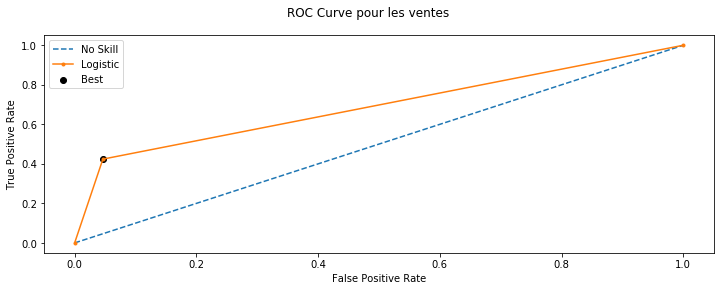

Best Threshold=1.000000, F-Score=0.494


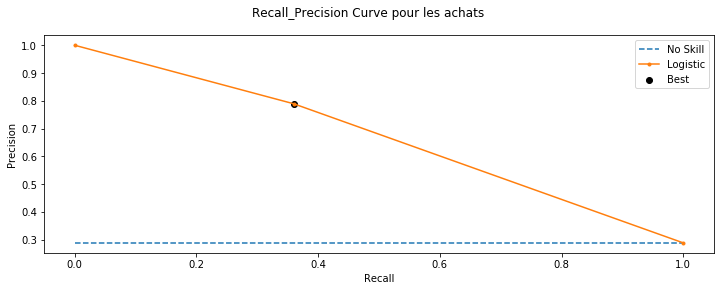

Best Threshold=1.000000, F-Score=0.550


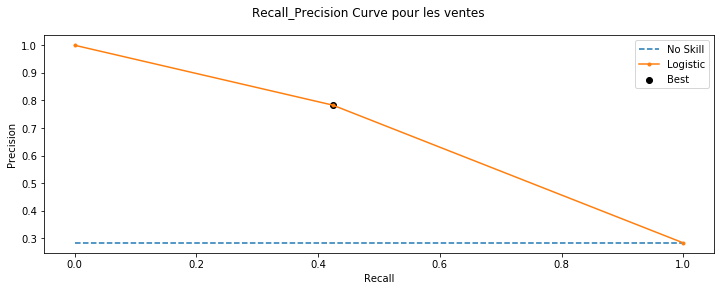

 Bagging K Neigbhors Classifier imbalanced pour  EUR/NZD 
DF
                  Date  OpenBid  HighBid   LowBid  CloseBid  OpenAsk  HighAsk  \
0  2010-09-07 16:20:00  1.76254  1.76327  1.76254    1.7629  1.76337  1.76406   

    LowAsk  CloseAsk  Total  ...    BOLMID    BOLLOW  delta_price_BOLLOW  \
0  1.76313   1.76382    131  ...  1.771867  1.762266            0.153697   

   delta_price_BOLUP  delat_price_ATR  delta_high_low  delta_close_open  \
0           0.604766         0.763377        0.010516           0.60146   

   Signal  BUY  SELL  
0       1    0     0  

[1 rows x 28 columns]
Signaux achat avant oversampling Counter({0: 3711, 1: 673})
Signaux vente avant oversampling Counter({0: 3651, 1: 687})
Signaux achat après oversampling Counter({0: 1855, 1: 610})
Signaux vente après oversampling Counter({0: 1779, 1: 610})
 Achat pour  EUR/NZD 

Achat - Accuracy : 77.93 %
Achat - Precision : 74.47 %
Achat - Recall : 16.39 %
Achat - F-measure: : 26.87 % 


              precision    r

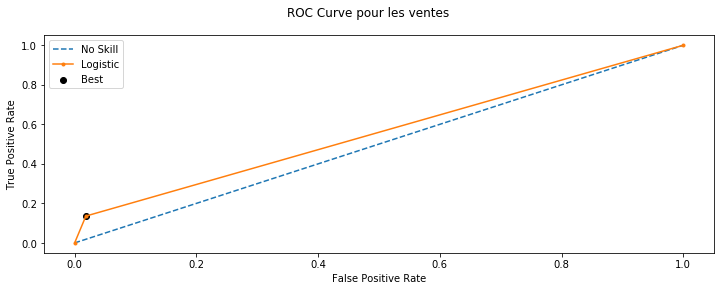

Best Threshold=0.000000, F-Score=0.397


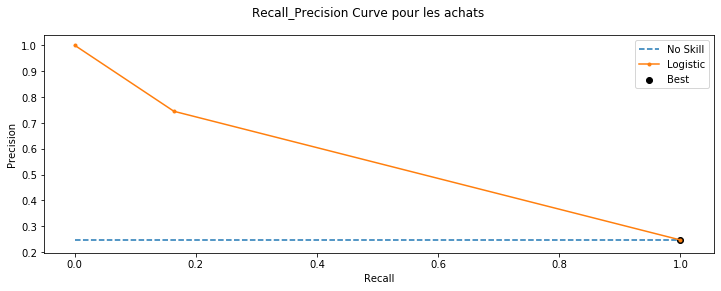

Best Threshold=0.000000, F-Score=0.407


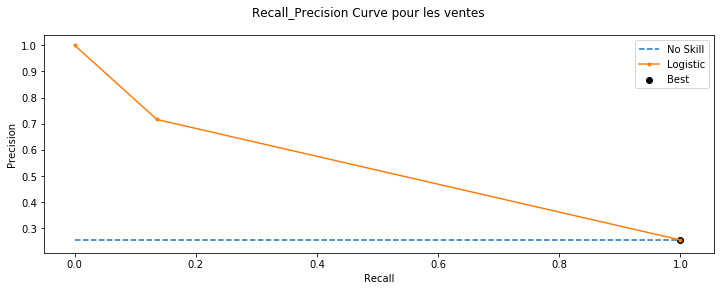



 ===> MODELISATION terminée.
Temps d'excution du module 0:01:02.029045


In [2]:
########################################
###### MODELISATION DES SIGNAUX ########
########################################

#from reglog import modelize
#from reglog_imbal import modelize
#from mlp_imbal import modelize
#from mlp import modelize
#from bayes_gnb import modelize
#from bayes_gnb_imbal import modelize
#from bayes_cnb import modelize
#from bayes_cnb_imbal import modelize
#from bayes_mnb import modelize
#from bayes_mnb_imbal import modelize
#from bayes_bnb import modelize
#from bayes_bnb_imbal import modelize
#from bayes_catnb import modelize
#from bayes_catnb_imbal import modelize
#from Kneib_centroid import modelize
#from Kneib_centroid_imbal import modelize
#from svm import modelize
#from svm_imbal import modelize
#from tree import modelize
#from tree_imbal import modelize
#from bag import modelize
from bag_imbal import modelize
#from forest import modelize
#from forest_imbal import modelize
#from adaboost import modelize
#from adaboost_imbal import modelize
#from gradientboosting import modelize
#from gradientboosting_imbal import modelize
#from mlpclassifier import modelize
#from mlpclassifier_imbal import modelize

import datetime as dt
from scraptickers import scrap_tickers
import multiprocessing.dummy as mp
#from generatesignals import gen_sig
from tqdm import tqdm
import configparser
config = configparser.ConfigParser()

config.read('config.ini')
_period1 = config.get('TIMEFRAME','_period1') # 'm5'
_period2 = config.get('TIMEFRAME','_period2') # 'H1'
_period3 = config.get('TIMEFRAME','_period3') # 'D1'
_path1 = config.get('PATH','_path1') # 'Base/'
_path2 = config.get('PATH','_path2') # 'Base_Clean/'
_path3 = config.get('PATH','_path3') # 'Base_Input/'
_path4 = config.get('PATH','_path4') # 'Base_Signals/'
_path5 = config.get('PATH','_path5') # 'Base_bt/'
_path = _path4
config['PATH']['_path'] = _path

with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)

TICKERS = scrap_tickers(_path)
config['TICKERS']['TICKERS'] = \
            str(TICKERS).replace("'",'').replace('[','').replace(']','').replace(',','').replace(' ',',')

with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(x)
print("\n\n ===> MODELISATION terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

In [3]:
####################################
############# BACKTEST #############
####################################

import pandas as pd
import time
import joblib
import colorama as col
from sklearn.preprocessing import MinMaxScaler
import talib
import datetime as dt
scaler = MinMaxScaler(feature_range=(0, 1))
import os
from scraptickers import scrap_tickers
import multiprocessing.dummy as mp
import configparser
config = configparser.ConfigParser()


In [4]:
### R A Z ####

DATE = []
CONTRACT = []
OPEN_POZ = []
CLOSE_POZ = []
RATE_OPEN_POZ = []
RATE_CLOSE_POZ = []
PNL_LAT = []
PNL_REAL = []
TOTAL_OPEN = []
TOTAL_CLOSE = []
PRICE_BUY = []
PRICE_SELL = []
DER_POZ = []
TOTAL_PNL_LAT = []
TOTAL_PNL_REAL = []
_cash_ini = 50000
_cash = _cash_ini
_target = 0.002
_sl = 0.004
_candle_limit = 26  # 580
_period = 'm5'
_period2 = 'H1'
_period3 = 'D1'
_verbose = 0

#_model = 'reglog'
#_model = 'reglog_imbal'
#_model = 'mlp_imbal'
#_model = 'mlp import'
#_model = 'bayes_gnb'
#_model = 'bayes_gnb_imbal'
#_model = 'bayes_cnb'
#_model = 'bayes_cnb_imbal'
#_model = 'bayes_mnb'
#_model = 'bayes_mnb_imbal'
#_model = 'bayes_bnb'
#_model = 'bayes_bnb_imbal'
#_model = 'bayes_catnb import'
#_model = 'bayes_catnb_imbal'
#_model = 'Kneib_centroid'
#_model = 'Kneib_centroid_imbal'
#_model = 'svm'
#_model = 'svm_imbal'
#_model = 'tree'
#_model = 'tree_imbal'
#_model = 'bag import'
_model = 'bag_imbal'
#_model = 'forest'
#_model = 'forest_imbal'
#_model = 'adaboost'
#_model = 'adaboost_imbal'
#_model = 'gradientboosting'
#_model = 'gradientboosting_imbal'
#_model = 'mlpclassifier'
#_model = 'mlpclassifier_imbal'


############################
#### FICHIE LOG ###########
#orig_out = sys.stdout
#sys.stdout = open("checkfile.txt", "w")
#--------------
#sys.stdout.close()
#sys.stdout = orig_out

In [26]:
%%time


config.read('config.ini')
_period1 = config.get('TIMEFRAME','_period1') # 'm5'
_period2 = config.get('TIMEFRAME','_period2') # 'H1'
_period3 = config.get('TIMEFRAME','_period3') # 'D1'
_path1 = config.get('PATH','_path1') # 'Base/'
_path2 = config.get('PATH','_path2') # 'Base_Clean/'
_path3 = config.get('PATH','_path3') # 'Base_Input/'
_path4 = config.get('PATH','_path4') # 'Base_Signals/'
_path5 = config.get('PATH','_path5') # 'Base_bt/'
_path = _path4
config['PATH']['_path'] = _path

with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)

TICKERS = scrap_tickers(_path)
config['TICKERS']['TICKERS'] = \
            str(TICKERS).replace("'",'').replace('[','').replace(']','').replace(',','').replace(' ',',')

with open('config.ini', 'w') as configfile:    # save
    config.write(configfile)

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())

#TICKERS = ['EUR/USD','USD/JPY','GBP/USD'] #,'USD/CHF','EUR/CHF' ,'AUD/USD','USD/CAD','NZD/USD','EUR/GBP','EUR/JPY','GBP/JPY','CHF/JPY','GBP/CHF','EUR/AUD','EUR/CAD','AUD/CAD','AUD/JPY','CAD/JPY','NZD/JPY','GBP/CAD','GBP/NZD','GBP/AUD','AUD/NZD','USD/SEK','EUR/SEK','EUR/NOK','USD/NOK','USD/MXN','AUD/CHF','EUR/NZD','USD/ZAR','ZAR/JPY','NZD/CHF','CAD/CHF','NZD/CAD','USD/ILS','USD/CNH']

#TICKERS = ['EUR/USD','NZD/CAD','EUR/CHF']

equity = 100000
def BT_model(_cash):
    for x in TICKERS:
        print(col.Fore.BLUE+'Backtest pour le ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)

        df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Average lenght of trade','Cumul pnl'])
        price = pd.read_csv('Base_Clean/'+x.replace('/','')+'m5'+'.csv')
        price = price.iloc[-int(len(price) * 0.2):,:]
        price['Close'] = (price.CloseBid + price.CloseAsk)/2
        price['High'] = (price.HighBid + price.HighAsk)/2
        price['Low'] = (price.LowBid + price.LowAsk)/2
        price['Open'] = (price.OpenBid + price.OpenAsk)/2

        _position = 0
        _equity = 0
        _nbtransactions = 0
        backtest_graph = pd.DataFrame()
        EQUITY = [_cash]
        CASH = [_cash]
        _winner = 0
        _looser = 0
        _index_entry = 0
        TRADE_DURATION = []
        _average_duration = 0
        _size = 50000

        PRICE_BUY = []
        PRICE_SELL = []

        _total = 0

        _filtre_multipoz = 0.3 # En %
        _filtre_multipoz = _filtre_multipoz/100
        
        _open_buy = 0
        _open_sell = 0
        _minipoz = 0

        MM21 = talib.EMA(price.Close, timeperiod=21)
        MM50 = talib.EMA(price.Close, timeperiod=50)
        MM200 = talib.EMA(price.Close, timeperiod=200)
        rsi = talib.RSI(price.Close, timeperiod=14)
        rsi_high = 70
        rsi_low = 30
        upperband, middleband, lowerband = talib.BBANDS(price.Close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
        fastk, fastd = talib.STOCHRSI(price.Close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)#STOCHASTICRSI
        slowk, slowd = talib.STOCH(price.High, price.Low, price.Close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)#STOCHASTIC

        try:
            savenameb = 'JOBLIB/'+_model+'/Save'+x.replace('/','')+'m5_buy.sav'
            savenamev = 'JOBLIB/'+_model+'/Save'+x.replace('/','')+'m5_sell.sav'
            loaded_modelb = joblib.load(savenameb)
            loaded_modelv = joblib.load(savenamev)
        except:
            print(col.Back.RED,col.Fore.BLACK,'\nTicker',x,'non modélisé!\n')
            continue

        price['delta_MM21_MM34'] = (talib.EMA(price.Close, timeperiod=21) - talib.EMA(price.CloseBid, timeperiod=34)) #* 1000
        price['BOLUP'],price['BOLMID'],price['BOLLOW'] = talib.BBANDS(price.CloseBid, timeperiod=252, nbdevup=2, nbdevdn=2, matype=0)
        price['delta_price_BOLLOW'] = (price.CloseBid - price.BOLLOW) #* 1000
        price['delta_price_BOLUP'] = (price.CloseBid - price.BOLUP) #* 1000
        price['delat_price_ATR'] = (((price.CloseBid - price.OpenBid)) - talib.ATR(price.HighBid,price.LowBid,price.CloseBid,timeperiod=5)) #* 1000
        price['delta_high_low'] = (price.HighBid - price.LowBid) #* 1000
        price['delta_close_open'] = (price.CloseBid - price.OpenBid) #* 1000

        price['delta_MM21_MM34'] = scaler.fit_transform(price[['delta_MM21_MM34']])
        price['delta_price_BOLLOW'] = scaler.fit_transform(price[['delta_price_BOLLOW']])
        price['delta_price_BOLUP'] = scaler.fit_transform(price[['delta_price_BOLUP']])
        price['delat_price_ATR'] = scaler.fit_transform(price[['delat_price_ATR']])
        price['delta_high_low'] = scaler.fit_transform(price[['delta_high_low']])
        price['delta_close_open'] = scaler.fit_transform(price[['delta_close_open']])

        price = price.dropna()
        
        print('Longueur de price',price.shape)
        print('Après traitement',price.drop(['Date','HigMax','LowMin','Total'],axis=1).shape)
        for i in range(len(price)):
            if _position == 0 :
                if slowk.values[i-1] > 80 and slowk.values[i-1] > slowd.values[i-1] and slowk.values[i] < slowd.values[i] and \
                    price.iloc[i-1]['High'] > price.iloc[i-2]['High'] and price.iloc[i]['High'] < price.iloc[i-2]['High'] and \
                        loaded_modelv.predict(price.iloc[i:i+1,:].drop(['Date','HigMax','LowMin','Total'],axis=1))[0] == 1\
                            and '06:00:00'<price.Date.iloc[i][11:19]<'21:00:00':

                            #drop(['OpenBid', 'HighBid', 'LowBid', 'OpenAsk', 'HighAsk', 'LowAsk',\
                            #'Date','CloseAsk','HigMax','LowMin','Total', 'Open', 'High', 'Low', 'Close', 'BOLUP', 'BOLMID', 'BOLLOW','CloseBid'],axis=1))[0] == 1:

                    _pnl = 0
                    _open_sell += 1
                    _equity = _cash + _pnl
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _index_entry = i
                    _position = -1
                    _nbtransactions += 1
                    price_sell = price.CloseBid.iloc[i]
                    PRICE_SELL.append(price_sell)
                    _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
                    

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(-1)
                    CLOSE_POZ.append(0)
                    RATE_OPEN_POZ.append(price_sell)
                    RATE_CLOSE_POZ.append(0) 
                    PNL_LAT.append(_pnl)
                    PNL_REAL.append(0)
                    TOTAL_PNL_LAT.append(_pnl)
                    TOTAL_PNL_REAL.append(0)

                    TOTAL_OPEN.append(1)

                elif slowk.values[i-1] < 20 and slowk.values[i-1] < slowd.values[i-1] and slowk.values[i] > slowd.values[i] \
                    and price.iloc[i-1]['Low'] < price.iloc[i-2]['Low'] and price.iloc[i]['Low'] > price.iloc[i-2]['Low'] \
                        and loaded_modelb.predict(price.iloc[i:i+1,:].drop(['Date','HigMax','LowMin','Total'],axis=1))[0] == 1\
                            and '06:00:00'<price.Date.iloc[i][11:19]<'21:00:00':
                        
                    _pnl = 0
                    _open_buy += 1
                    _equity = _cash + _pnl
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _position = 1
                    _index_entry = i
                    _nbtransactions += 1
                    price_buy = price.CloseAsk.iloc[i]
                    PRICE_BUY.append(price_buy)
                    _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
                    if _verbose == 1:
                        print('\nLe ',price.Date.iloc[i],'Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')
                        print('Nouvelle moyenne du price_buy',_price_buy_mean)

                    DATE.append(price.Date.iloc[i])# .strftime(format='%Y-%m-%d %H:%M:%S'))
                    CONTRACT.append(x)
                    OPEN_POZ.append(1)
                    CLOSE_POZ.append(0)
                    RATE_OPEN_POZ.append(price_buy)
                    RATE_CLOSE_POZ.append(0)
                    PNL_LAT.append(_pnl)
                    PNL_REAL.append(0)
                    TOTAL_OPEN.append(1) 
                    TOTAL_PNL_LAT.append(_pnl)
                    TOTAL_PNL_REAL.append(0) 

                else :
                    _pnl = 0
                    _equity = _cash + _pnl
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    
            elif _position == 1:

                if (slowk.values[i-1] < 20 and slowk.values[i-1] < slowd.values[i-1] and slowk.values[i] > slowd.values[i]\
                    and price.iloc[i-1]['Low'] < price.iloc[i-2]['Low'] and price.iloc[i]['Low'] > price.iloc[i-2]['Low']\
                        and loaded_modelb.predict(price.iloc[i:i+1,:].drop(['Date','HigMax','LowMin','Total'],axis=1))[0] == 1\
                                    and (price_buy - price.Close.iloc[i]) / price_buy )>= _filtre_multipoz: # \
                                        

                    _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy
                    _open_buy += 1
                    _equity = _cash + _pnl
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _position = 1
                    _index_entry = i
                    _nbtransactions += 1
                    price_buy = price.CloseAsk.iloc[i]
                    PRICE_BUY.append(price_buy)
                    _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
                    

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(1)
                    CLOSE_POZ.append(0)
                    RATE_OPEN_POZ.append(price_buy)
                    RATE_CLOSE_POZ.append(0)
                    PNL_LAT.append(_pnl)
                    PNL_REAL.append(0)
                    TOTAL_OPEN.append(1) 
                    TOTAL_PNL_LAT.append(_pnl)
                    TOTAL_PNL_REAL.append(0)
                
                elif (float(price.CloseBid.iloc[i]) - float(_price_buy_mean))/float(_price_buy_mean) >= _target :

                    _position = 0
                    _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy
                    _total += _pnl
                    _cash += _pnl
                    _equity = _cash
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _winner += _open_buy

                    TRADE_DURATION.append(i - _index_entry)
                    if _verbose == 1:
                        print(i)
                        print(col.Fore.GREEN,'\nLe ',price.Date.iloc[i],' ',_open_buy,'positions TP closed at',price.CloseBid.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                        print('nombre de candles en position :',i - _index_entry)
                        print('Equity :', _equity)
                        print(col.Fore.BLUE,'__________________________________________________________________________________',col.Style.RESET_ALL)
                        print('')

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(0)
                    CLOSE_POZ.append(1)
                    RATE_OPEN_POZ.append(0)
                    RATE_CLOSE_POZ.append(price.CloseBid.iloc[i])
                    PNL_LAT.append(0)
                    PNL_REAL.append(_pnl)
                    TOTAL_PNL_LAT.append(0)
                    TOTAL_PNL_REAL.append(_pnl)
                    TOTAL_CLOSE.append(_open_buy)
                    PRICE_BUY = [] 
                    _open_buy = 0

                elif (float(price.CloseBid.iloc[i]) - float(_price_buy_mean))/float(_price_buy_mean) <= -_sl or \
                    (((i - _index_entry) > _candle_limit) and (float(price.CloseBid.iloc[i]) - float(_price_buy_mean) < 0)):

                    _position = 0
                    _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy
                    _total += _pnl
                    _cash += _pnl
                    _equity = _cash
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _looser += _open_buy

                    TRADE_DURATION.append(i - _index_entry)
                    if _verbose == 1:
                        print(i)
                        print(col.Fore.RED,'\nLe ',price.Date.iloc[i],' ',_open_buy,'positions SL closed at',price.CloseBid.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                        print('nombre de candles en position :',i - _index_entry)
                        print('Equity :', _equity)
                        print(col.Fore.BLUE,'__________________________________________________________________________________',col.Style.RESET_ALL)
                        print('')

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(0)
                    CLOSE_POZ.append(1)
                    RATE_OPEN_POZ.append(0)
                    RATE_CLOSE_POZ.append(price.CloseBid.iloc[i])
                    PNL_LAT.append(0)
                    PNL_REAL.append(_pnl)
                    TOTAL_CLOSE.append(_open_buy) 
                    TOTAL_PNL_LAT.append(0)
                    TOTAL_PNL_REAL.append(_pnl)
                    PRICE_BUY = []
                    _open_buy = 0

                else:
                        
                        _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy
                        _equity = _cash + _pnl
                        EQUITY.append(_equity)
                        CASH.append(_cash)

                        DATE.append(price.Date.iloc[i])
                        CONTRACT.append(x)
                        OPEN_POZ.append(0)
                        CLOSE_POZ.append(0)
                        RATE_OPEN_POZ.append(0)
                        RATE_CLOSE_POZ.append(0) ############### 
                        PNL_LAT.append(_pnl)
                        PNL_REAL.append(0)
                        TOTAL_PNL_LAT.append(_pnl)
                        TOTAL_PNL_REAL.append(0) 


            elif _position == -1:

                if (slowk.values[i-1] > 80 and slowk.values[i-1] > slowd.values[i-1] and slowk.values[i] < slowd.values[i] \
                    and price.iloc[i-1]['High'] > price.iloc[i-2]['High'] and price.iloc[i]['High'] < price.iloc[i-2]['High'] \
                        and loaded_modelv.predict(price.iloc[i:i+1,:].drop(['Date','HigMax','LowMin','Total'],axis=1))[0] == 1\
                                and (price.Close.iloc[i] - price_sell) / price_sell) >= _filtre_multipoz:

                    _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell
                    _open_sell += 1
                    _equity = _cash + _pnl
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _position = -1
                    _index_entry = i
                    _nbtransactions += 1
                    price_sell = price.CloseBid.iloc[i]
                    PRICE_SELL.append(price_sell)
                    _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
                    if _verbose == 1:
                        print('\nLe ',price.Date.iloc[i],'Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')
                        print(col.Fore.YELLOW,'Nouvelle',col.Style.RESET_ALL, 'moyenne du price_sell',_price_sell_mean)

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(1)
                    CLOSE_POZ.append(0)
                    RATE_OPEN_POZ.append(price_sell)
                    RATE_CLOSE_POZ.append(0)
                    PNL_LAT.append(_pnl)
                    PNL_REAL.append(0)
                    TOTAL_OPEN.append(1) 
                    TOTAL_PNL_LAT.append(_pnl)
                    TOTAL_PNL_REAL.append(0) 



                elif (float(price.CloseAsk.iloc[i]) - float(_price_sell_mean))/float(_price_sell_mean) <= -_target :

                    _position = 0
                    _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell
                    _total += _pnl
                    _cash += _pnl
                    _equity = _cash
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _winner += _open_sell
                    TRADE_DURATION.append(i - _index_entry)
                    if _verbose == 1:
                        print(col.Fore.GREEN,'\nLe ',price.Date.iloc[i],' ',_open_sell,'positions TP closed at',price.CloseAsk.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                        print('nombre de candles en position :',i - _index_entry)
                        print('Equity :', _equity)
                        print(col.Fore.BLUE,'__________________________________________________________________________________',col.Style.RESET_ALL)
                        print('')

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(0)
                    CLOSE_POZ.append(-1)
                    RATE_OPEN_POZ.append(0)
                    RATE_CLOSE_POZ.append(price.CloseAsk.iloc[i])
                    PNL_LAT.append(0)
                    PNL_REAL.append(_pnl)
                    TOTAL_PNL_LAT.append(0)
                    TOTAL_PNL_REAL.append(_pnl)
                    TOTAL_CLOSE.append(_open_sell)
                    PRICE_SELL = [] 
                    _open_sell = 0

                elif (float(price.CloseAsk.iloc[i]) - float(_price_sell_mean))/float(_price_sell_mean) >= _sl or \
                    (((i - _index_entry) > _candle_limit) and (float(price.CloseBid.iloc[i]) - float(_price_sell_mean) > 0)):
                    _position = 0
                    _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell
                    _total += _pnl
                    _cash += _pnl
                    _equity = _cash
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _looser += _open_sell
                    TRADE_DURATION.append(i - _index_entry)
                    if _verbose == 1:
                        print(i)
                        print(col.Fore.RED,'\nLe ',price.Date.iloc[i],' ',_open_sell,'position SL closed at',price.CloseAsk.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                        print('nombre de candles en position :',i - _index_entry)
                        print('Equity :', _equity)
                        print(col.Fore.BLUE,'__________________________________________________________________________________',col.Style.RESET_ALL)
                        print('')

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(0)
                    CLOSE_POZ.append(-1)
                    RATE_OPEN_POZ.append(0)
                    RATE_CLOSE_POZ.append(price.CloseAsk.iloc[i])
                    PNL_LAT.append(0)
                    PNL_REAL.append(_pnl)
                    TOTAL_PNL_LAT.append(0)
                    TOTAL_PNL_REAL.append(_pnl)
                    TOTAL_CLOSE.append(_open_sell)
                    PRICE_SELL = []
                    _open_sell = 0

                else:
                    
                    _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell
                    _equity = _cash + _pnl

                    EQUITY.append(_equity)
                    CASH.append(_cash)

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(0)
                    CLOSE_POZ.append(0)
                    RATE_OPEN_POZ.append(0)
                    RATE_CLOSE_POZ.append(0)
                    PNL_LAT.append(_pnl)
                    PNL_REAL.append(0)
                    TOTAL_PNL_LAT.append(_pnl)

                    TOTAL_PNL_REAL.append(0)
                                                    

        if _position == -1:
            _position = 0
            _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.CYAN,"\nCloture des positions en l'air",col.Style.RESET_ALL)
                print(col.Fore.RED,'\nLe ',price.Date.iloc[i],' ',_open_sell,'position closed at',price.CloseAsk.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.Date.iloc[i])
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.CloseAsk.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if _position == 1:

            _position = 0
            _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.CYAN,"\nCloture des positions en l'air",col.Style.RESET_ALL)
                print(col.Fore.RED,'\nLe ',price.Date.iloc[i],' ',_open_buy,'positions closed at',price.CloseBid.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.Date.iloc[i])
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.CloseBid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0
        print(col.Fore.MAGENTA,'********************************************************************************',col.Style.RESET_ALL)
        print(col.Fore.BLUE+'\nSynthèse pour le ticker\n',col.Fore.YELLOW,x,col.Style.RESET_ALL)
        try:
            _average_duration = round(statistics.mean(TRADE_DURATION),2)

        except:
            print("(pas de duration)") 
            _average_duration = 'NA'               
        print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.GREEN,round(_total,2),'! En ',_nbtransactions,' transactions.',col.Style.RESET_ALL ) 
        print(col.Fore.GREEN,"\nNbre de winners :",_winner,col.Style.RESET_ALL)
        print(col.Fore.RED,"\nNbre de loosers :",_looser,col.Style.RESET_ALL)
        print("\nAverage trade duration ",_average_duration)
        backtest_graph['Equity'] = EQUITY

        df_resultats[x] = [_period,_period2,(round(_equity,2)),(_winner),(_looser),(_average_duration),(_total)]

        print('Total des gains faramineux :',round(EQUITY[-1] - _cash_ini,2))
        print('Pnl latent restant',_pnl,'Open Buy',_open_buy,'Open Sell',_open_sell)
        DER_POZ.append(_pnl)
        print(col.Fore.MAGENTA,'********************************************************************************',col.Style.RESET_ALL)
        print(col.Fore.BLUE,'__________________________________________________________________________________',col.Style.RESET_ALL)
        print('')

    print(col.Fore.BLUE,'Total des gains faramineux :',round(EQUITY[-1] - _cash_ini,2),col.Style.RESET_ALL)
    print(col.Fore.YELLOW,'Total du cash titanesque :',round(EQUITY[-1],2),col.Style.RESET_ALL)

    df_historical = pd.DataFrame()
    df_historical = pd.DataFrame(index=DATE)
    df_historical['Contract'] = CONTRACT
    df_historical['Open_Poz'] = OPEN_POZ
    df_historical['Close_Pos'] = CLOSE_POZ
    df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
    df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
    df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
    df_historical['Pnl_Real'] = TOTAL_PNL_REAL
    df_historical.sort_index()
    df_historical


    print('Cash généré :',str(round(df_historical.Pnl_Real.sum(),2))+'$')
    print('Pnl latent minimal :',str(df_historical.Pnl_Real.min())+'$')
    print('Pnl latent maximal :',str(df_historical.Pnl_Real.max())+'$')
    print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean(),2))+'$')
    print('Max des durées moyennes',df_resultats.T['Average lenght of trade'][df_resultats.T['Average lenght of trade'] != 'NA'].max())
    print('Min des durées moyennes',df_resultats.T['Average lenght of trade'][df_resultats.T['Average lenght of trade'] != 'NA'].min())
    print('Moyenne des durées moyennes',round(df_resultats.T['Average lenght of trade'][df_resultats.T['Average lenght of trade'] != 'NA'].mean(),2))
    print('Nombre total de winners',df_resultats.T['Nbre Winners'].sum())
    print('Nombre total de loosers',df_resultats.T['Nbre Loosers'].sum())
    print('Total des gains cumulés',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum(),2))
    print('Total des pertes cumulées',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2))
    print(col.Fore.BLUE,'PROFIT FACTOR : ',\
        abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
    print(col.Fore.CYAN,'Ratio du nombre de winners :',\
        round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),'%',col.Style.RESET_ALL)
    print('Nombre total de trades ouverts',sum(TOTAL_OPEN))
    print('Nombre total de trades fermés',sum(TOTAL_CLOSE))
    print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

    _t2 = dt.datetime.now()
    print("Temps d'excution du module",str((_t2 - _t1)))
    return()

Base_Signals/
Début des opérations horodatée à 2020-11-05 14:35:20.222442
CPU times: user 1.21 ms, sys: 1.02 ms, total: 2.22 ms
Wall time: 2.76 ms


In [27]:

DATE = []
CONTRACT = []
OPEN_POZ = []
CLOSE_POZ = []
RATE_OPEN_POZ = []
RATE_CLOSE_POZ = []
PNL_LAT = []
PNL_REAL = []
TOTAL_OPEN = []
TOTAL_CLOSE = []
PRICE_BUY = []
PRICE_SELL = []
DER_POZ = []
TOTAL_PNL_LAT = []
TOTAL_PNL_REAL = []
_cash_ini = 50000
_cash = _cash_ini
_target = 0.002
_sl = 0.004
_candle_limit = 26  # 580
_period = 'm5'
_period2 = 'H1'
_period3 = 'D1'
_verbose = 0

def BT_neutral(_cash):
    for x in TICKERS:
        print(col.Fore.BLUE+'Backtest pour le ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)

        df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Average lenght of trade','Cumul pnl'])
        price = pd.read_csv('Base_Clean/'+x.replace('/','')+'m5'+'.csv')
        price = price.iloc[-int(len(price) * 0.2):,:]
        price['Close'] = (price.CloseBid + price.CloseAsk)/2
        price['High'] = (price.HighBid + price.HighAsk)/2
        price['Low'] = (price.LowBid + price.LowAsk)/2
        price['Open'] = (price.OpenBid + price.OpenAsk)/2

        _position = 0
        _equity = 0
        _nbtransactions = 0
        backtest_graph = pd.DataFrame()
        EQUITY = [_cash]
        CASH = [_cash]
        _winner = 0
        _looser = 0
        _index_entry = 0
        TRADE_DURATION = []
        _average_duration = 0
        _size = 50000

        PRICE_BUY = []
        PRICE_SELL = []

        _total = 0

        _filtre_multipoz = 0.3 # En %
        _filtre_multipoz = _filtre_multipoz/100
        
        _open_buy = 0
        _open_sell = 0
        _minipoz = 0

        MM21 = talib.EMA(price.Close, timeperiod=21)
        MM50 = talib.EMA(price.Close, timeperiod=50)
        MM200 = talib.EMA(price.Close, timeperiod=200)
        rsi = talib.RSI(price.Close, timeperiod=14)
        rsi_high = 70
        rsi_low = 30
        upperband, middleband, lowerband = talib.BBANDS(price.Close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
        fastk, fastd = talib.STOCHRSI(price.Close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)#STOCHASTICRSI
        slowk, slowd = talib.STOCH(price.High, price.Low, price.Close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)#STOCHASTIC

        price['BOLUP'],price['BOLMID'],price['BOLLOW'] = talib.BBANDS(price.CloseBid, timeperiod=252, nbdevup=2, nbdevdn=2, matype=0)

        price = price.dropna()
        
        print('Longueur de price',price.shape)

        for i in range(len(price)):
            if _position == 0 :
                if slowk.values[i-1] > 80 and slowk.values[i-1] > slowd.values[i-1] and slowk.values[i] < slowd.values[i] and \
                    price.iloc[i-1]['High'] > price.iloc[i-2]['High'] and price.iloc[i]['High'] < price.iloc[i-2]['High'] and \
                        '06:00:00'<price.Date.iloc[i][11:19]<'21:00:00':

                            #drop(['OpenBid', 'HighBid', 'LowBid', 'OpenAsk', 'HighAsk', 'LowAsk',\
                            #'Date','CloseAsk','HigMax','LowMin','Total', 'Open', 'High', 'Low', 'Close', 'BOLUP', 'BOLMID', 'BOLLOW','CloseBid'],axis=1))[0] == 1:

                    _pnl = 0
                    _open_sell += 1
                    _equity = _cash + _pnl
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _index_entry = i
                    _position = -1
                    _nbtransactions += 1
                    price_sell = price.CloseBid.iloc[i]
                    PRICE_SELL.append(price_sell)
                    _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
                    

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(-1)
                    CLOSE_POZ.append(0)
                    RATE_OPEN_POZ.append(price_sell)
                    RATE_CLOSE_POZ.append(0) 
                    PNL_LAT.append(_pnl)
                    PNL_REAL.append(0)
                    TOTAL_PNL_LAT.append(_pnl)
                    TOTAL_PNL_REAL.append(0)

                    TOTAL_OPEN.append(1)

                elif slowk.values[i-1] < 20 and slowk.values[i-1] < slowd.values[i-1] and slowk.values[i] > slowd.values[i] \
                    and price.iloc[i-1]['Low'] < price.iloc[i-2]['Low'] and price.iloc[i]['Low'] > price.iloc[i-2]['Low'] \
                            and '06:00:00'<price.Date.iloc[i][11:19]<'21:00:00':
                        
                    _pnl = 0
                    _open_buy += 1
                    _equity = _cash + _pnl
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _position = 1
                    _index_entry = i
                    _nbtransactions += 1
                    price_buy = price.CloseAsk.iloc[i]
                    PRICE_BUY.append(price_buy)
                    _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
                    if _verbose == 1:
                        print('\nLe ',price.Date.iloc[i],'Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')
                        print('Nouvelle moyenne du price_buy',_price_buy_mean)

                    DATE.append(price.Date.iloc[i])# .strftime(format='%Y-%m-%d %H:%M:%S'))
                    CONTRACT.append(x)
                    OPEN_POZ.append(1)
                    CLOSE_POZ.append(0)
                    RATE_OPEN_POZ.append(price_buy)
                    RATE_CLOSE_POZ.append(0)
                    PNL_LAT.append(_pnl)
                    PNL_REAL.append(0)
                    TOTAL_OPEN.append(1) 
                    TOTAL_PNL_LAT.append(_pnl)
                    TOTAL_PNL_REAL.append(0) 

                else :
                    _pnl = 0
                    _equity = _cash + _pnl
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    
            elif _position == 1:

                if (slowk.values[i-1] < 20 and slowk.values[i-1] < slowd.values[i-1] and slowk.values[i] > slowd.values[i]\
                    and price.iloc[i-1]['Low'] < price.iloc[i-2]['Low'] and price.iloc[i]['Low'] > price.iloc[i-2]['Low']\
                                    and (price_buy - price.Close.iloc[i]) / price_buy )>= _filtre_multipoz: # \
                                        

                    _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy
                    _open_buy += 1
                    _equity = _cash + _pnl
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _position = 1
                    _index_entry = i
                    _nbtransactions += 1
                    price_buy = price.CloseAsk.iloc[i]
                    PRICE_BUY.append(price_buy)
                    _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
                    

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(1)
                    CLOSE_POZ.append(0)
                    RATE_OPEN_POZ.append(price_buy)
                    RATE_CLOSE_POZ.append(0)
                    PNL_LAT.append(_pnl)
                    PNL_REAL.append(0)
                    TOTAL_OPEN.append(1) 
                    TOTAL_PNL_LAT.append(_pnl)
                    TOTAL_PNL_REAL.append(0)
                
                elif (float(price.CloseBid.iloc[i]) - float(_price_buy_mean))/float(_price_buy_mean) >= _target :

                    _position = 0
                    _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy
                    _total += _pnl
                    _cash += _pnl
                    _equity = _cash
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _winner += _open_buy

                    TRADE_DURATION.append(i - _index_entry)
                    if _verbose == 1:
                        print(i)
                        print(col.Fore.GREEN,'\nLe ',price.Date.iloc[i],' ',_open_buy,'positions TP closed at',price.CloseBid.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                        print('nombre de candles en position :',i - _index_entry)
                        print('Equity :', _equity)
                        print(col.Fore.BLUE,'__________________________________________________________________________________',col.Style.RESET_ALL)
                        print('')

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(0)
                    CLOSE_POZ.append(1)
                    RATE_OPEN_POZ.append(0)
                    RATE_CLOSE_POZ.append(price.CloseBid.iloc[i])
                    PNL_LAT.append(0)
                    PNL_REAL.append(_pnl)
                    TOTAL_PNL_LAT.append(0)
                    TOTAL_PNL_REAL.append(_pnl)
                    TOTAL_CLOSE.append(_open_buy)
                    PRICE_BUY = [] 
                    _open_buy = 0

                elif (float(price.CloseBid.iloc[i]) - float(_price_buy_mean))/float(_price_buy_mean) <= -_sl or \
                    (((i - _index_entry) > _candle_limit) and (float(price.CloseBid.iloc[i]) - float(_price_buy_mean) < 0)):

                    _position = 0
                    _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy
                    _total += _pnl
                    _cash += _pnl
                    _equity = _cash
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _looser += _open_buy

                    TRADE_DURATION.append(i - _index_entry)
                    if _verbose == 1:
                        print(i)
                        print(col.Fore.RED,'\nLe ',price.Date.iloc[i],' ',_open_buy,'positions SL closed at',price.CloseBid.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                        print('nombre de candles en position :',i - _index_entry)
                        print('Equity :', _equity)
                        print(col.Fore.BLUE,'__________________________________________________________________________________',col.Style.RESET_ALL)
                        print('')

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(0)
                    CLOSE_POZ.append(1)
                    RATE_OPEN_POZ.append(0)
                    RATE_CLOSE_POZ.append(price.CloseBid.iloc[i])
                    PNL_LAT.append(0)
                    PNL_REAL.append(_pnl)
                    TOTAL_CLOSE.append(_open_buy) 
                    TOTAL_PNL_LAT.append(0)
                    TOTAL_PNL_REAL.append(_pnl)
                    PRICE_BUY = []
                    _open_buy = 0

                else:
                        
                        _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy
                        _equity = _cash + _pnl
                        EQUITY.append(_equity)
                        CASH.append(_cash)

                        DATE.append(price.Date.iloc[i])
                        CONTRACT.append(x)
                        OPEN_POZ.append(0)
                        CLOSE_POZ.append(0)
                        RATE_OPEN_POZ.append(0)
                        RATE_CLOSE_POZ.append(0) ############### 
                        PNL_LAT.append(_pnl)
                        PNL_REAL.append(0)
                        TOTAL_PNL_LAT.append(_pnl)
                        TOTAL_PNL_REAL.append(0) 


            elif _position == -1:

                if (slowk.values[i-1] > 80 and slowk.values[i-1] > slowd.values[i-1] and slowk.values[i] < slowd.values[i] \
                    and price.iloc[i-1]['High'] > price.iloc[i-2]['High'] and price.iloc[i]['High'] < price.iloc[i-2]['High'] \
                                and (price.Close.iloc[i] - price_sell) / price_sell) >= _filtre_multipoz:

                    _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell
                    _open_sell += 1
                    _equity = _cash + _pnl
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _position = -1
                    _index_entry = i
                    _nbtransactions += 1
                    price_sell = price.CloseBid.iloc[i]
                    PRICE_SELL.append(price_sell)
                    _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
                    if _verbose == 1:
                        print('\nLe ',price.Date.iloc[i],'Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')
                        print(col.Fore.YELLOW,'Nouvelle',col.Style.RESET_ALL, 'moyenne du price_sell',_price_sell_mean)

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(1)
                    CLOSE_POZ.append(0)
                    RATE_OPEN_POZ.append(price_sell)
                    RATE_CLOSE_POZ.append(0)
                    PNL_LAT.append(_pnl)
                    PNL_REAL.append(0)
                    TOTAL_OPEN.append(1) 
                    TOTAL_PNL_LAT.append(_pnl)
                    TOTAL_PNL_REAL.append(0) 



                elif (float(price.CloseAsk.iloc[i]) - float(_price_sell_mean))/float(_price_sell_mean) <= -_target :

                    _position = 0
                    _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell
                    _total += _pnl
                    _cash += _pnl
                    _equity = _cash
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _winner += _open_sell
                    TRADE_DURATION.append(i - _index_entry)
                    if _verbose == 1:
                        print(col.Fore.GREEN,'\nLe ',price.Date.iloc[i],' ',_open_sell,'positions TP closed at',price.CloseAsk.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                        print('nombre de candles en position :',i - _index_entry)
                        print('Equity :', _equity)
                        print(col.Fore.BLUE,'__________________________________________________________________________________',col.Style.RESET_ALL)
                        print('')

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(0)
                    CLOSE_POZ.append(-1)
                    RATE_OPEN_POZ.append(0)
                    RATE_CLOSE_POZ.append(price.CloseAsk.iloc[i])
                    PNL_LAT.append(0)
                    PNL_REAL.append(_pnl)
                    TOTAL_PNL_LAT.append(0)
                    TOTAL_PNL_REAL.append(_pnl)
                    TOTAL_CLOSE.append(_open_sell)
                    PRICE_SELL = [] 
                    _open_sell = 0

                elif (float(price.CloseAsk.iloc[i]) - float(_price_sell_mean))/float(_price_sell_mean) >= _sl or \
                    (((i - _index_entry) > _candle_limit) and (float(price.CloseBid.iloc[i]) - float(_price_sell_mean) > 0)):
                    _position = 0
                    _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell
                    _total += _pnl
                    _cash += _pnl
                    _equity = _cash
                    EQUITY.append(_equity)
                    CASH.append(_cash)
                    _looser += _open_sell
                    TRADE_DURATION.append(i - _index_entry)
                    if _verbose == 1:
                        print(i)
                        print(col.Fore.RED,'\nLe ',price.Date.iloc[i],' ',_open_sell,'position SL closed at',price.CloseAsk.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                        print('nombre de candles en position :',i - _index_entry)
                        print('Equity :', _equity)
                        print(col.Fore.BLUE,'__________________________________________________________________________________',col.Style.RESET_ALL)
                        print('')

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(0)
                    CLOSE_POZ.append(-1)
                    RATE_OPEN_POZ.append(0)
                    RATE_CLOSE_POZ.append(price.CloseAsk.iloc[i])
                    PNL_LAT.append(0)
                    PNL_REAL.append(_pnl)
                    TOTAL_PNL_LAT.append(0)
                    TOTAL_PNL_REAL.append(_pnl)
                    TOTAL_CLOSE.append(_open_sell)
                    PRICE_SELL = []
                    _open_sell = 0

                else:
                    
                    _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell
                    _equity = _cash + _pnl

                    EQUITY.append(_equity)
                    CASH.append(_cash)

                    DATE.append(price.Date.iloc[i])
                    CONTRACT.append(x)
                    OPEN_POZ.append(0)
                    CLOSE_POZ.append(0)
                    RATE_OPEN_POZ.append(0)
                    RATE_CLOSE_POZ.append(0)
                    PNL_LAT.append(_pnl)
                    PNL_REAL.append(0)
                    TOTAL_PNL_LAT.append(_pnl)

                    TOTAL_PNL_REAL.append(0)
                                                    

        if _position == -1:
            _position = 0
            _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.CYAN,"\nCloture des positions en l'air",col.Style.RESET_ALL)
                print(col.Fore.RED,'\nLe ',price.Date.iloc[i],' ',_open_sell,'position closed at',price.CloseAsk.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.Date.iloc[i])
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.CloseAsk.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if _position == 1:

            _position = 0
            _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.CYAN,"\nCloture des positions en l'air",col.Style.RESET_ALL)
                print(col.Fore.RED,'\nLe ',price.Date.iloc[i],' ',_open_buy,'positions closed at',price.CloseBid.iloc[i],'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.Date.iloc[i])
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.CloseBid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0
        print(col.Fore.MAGENTA,'********************************************************************************',col.Style.RESET_ALL)
        print(col.Fore.BLUE+'\nSynthèse pour le ticker\n',col.Fore.YELLOW,x,col.Style.RESET_ALL)
        try:
            _average_duration = round(statistics.mean(TRADE_DURATION),2)

        except:
            print("(pas de duration)") 
            _average_duration = 'NA'               
        print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.GREEN,round(_total,2),'! En ',_nbtransactions,' transactions.',col.Style.RESET_ALL ) 
        print(col.Fore.GREEN,"\nNbre de winners :",_winner,col.Style.RESET_ALL)
        print(col.Fore.RED,"\nNbre de loosers :",_looser,col.Style.RESET_ALL)
        print("\nAverage trade duration ",_average_duration)
        backtest_graph['Equity'] = EQUITY

        df_resultats[x] = [_period,_period2,(round(_equity,2)),(_winner),(_looser),(_average_duration),(_total)]

        print('Total des gains faramineux :',round(EQUITY[-1] - _cash_ini,2))
        print('Pnl latent restant',_pnl,'Open Buy',_open_buy,'Open Sell',_open_sell)
        DER_POZ.append(_pnl)
        print(col.Fore.MAGENTA,'********************************************************************************',col.Style.RESET_ALL)
        print(col.Fore.BLUE,'__________________________________________________________________________________',col.Style.RESET_ALL)
        print('')

    print(col.Fore.BLUE,'Total des gains faramineux :',round(EQUITY[-1] - _cash_ini,2),col.Style.RESET_ALL)
    print(col.Fore.YELLOW,'Total du cash titanesque :',round(EQUITY[-1],2),col.Style.RESET_ALL)

    df_historical = pd.DataFrame()
    df_historical = pd.DataFrame(index=DATE)
    df_historical['Contract'] = CONTRACT
    df_historical['Open_Poz'] = OPEN_POZ
    df_historical['Close_Pos'] = CLOSE_POZ
    df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
    df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
    df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
    df_historical['Pnl_Real'] = TOTAL_PNL_REAL
    df_historical.sort_index()
    df_historical


    print('Cash généré :',str(round(df_historical.Pnl_Real.sum(),2))+'$')
    print('Pnl latent minimal :',str(df_historical.Pnl_Real.min())+'$')
    print('Pnl latent maximal :',str(df_historical.Pnl_Real.max())+'$')
    print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean(),2))+'$')
    print('Max des durées moyennes',df_resultats.T['Average lenght of trade'][df_resultats.T['Average lenght of trade'] != 'NA'].max())
    print('Min des durées moyennes',df_resultats.T['Average lenght of trade'][df_resultats.T['Average lenght of trade'] != 'NA'].min())
    print('Moyenne des durées moyennes',round(df_resultats.T['Average lenght of trade'][df_resultats.T['Average lenght of trade'] != 'NA'].mean(),2))
    print('Nombre total de winners',df_resultats.T['Nbre Winners'].sum())
    print('Nombre total de loosers',df_resultats.T['Nbre Loosers'].sum())
    print('Total des gains cumulés',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum(),2))
    print('Total des pertes cumulées',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2))
    print(col.Fore.BLUE,'PROFIT FACTOR : ',\
        abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
    print(col.Fore.CYAN,'Ratio du nombre de winners :',\
        round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),'%',col.Style.RESET_ALL)
    print('Nombre total de trades ouverts',sum(TOTAL_OPEN))
    print('Nombre total de trades fermés',sum(TOTAL_CLOSE))
    print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

    _t2 = dt.datetime.now()
    print("Temps d'excution du module",str((_t2 - _t1)))
    return()

In [28]:
BT_neutral(_cash)

Backtest pour le ticker  USD/CHF 
Longueur de price (148755, 19)
 ******************************************************************************** 

Synthèse pour le ticker
  USD/CHF 
(pas de duration)
 
Les gains faramineux s'élèvent à : $  -7364.0 ! En  723  transactions. 
 
Nbre de winners : 151 
 
Nbre de loosers : 572 

Average trade duration  NA
Total des gains faramineux : -7364.0
Pnl latent restant 0 Open Buy 0 Open Sell 0
 ******************************************************************************** 
 __________________________________________________________________________________ 

Backtest pour le ticker  USD/NOK 
Longueur de price (149024, 19)
 ******************************************************************************** 

Synthèse pour le ticker
  USD/NOK 
(pas de duration)
 
Les gains faramineux s'élèvent à : $  -115908.0 ! En  798  transactions. 
 
Nbre de winners : 248 
 
Nbre de loosers : 550 

Average trade duration  NA
Total des gains faramineux : -123272.0
P

()

In [29]:
BT_model(_cash)

Backtest pour le ticker  USD/CHF 
Longueur de price (148755, 25)
Après traitement (148755, 21)
 ******************************************************************************** 

Synthèse pour le ticker
  USD/CHF 
(pas de duration)
 
Les gains faramineux s'élèvent à : $  0 ! En  0  transactions. 
 
Nbre de winners : 0 
 
Nbre de loosers : 0 

Average trade duration  NA
Total des gains faramineux : 0
Pnl latent restant 0 Open Buy 0 Open Sell 0
 ******************************************************************************** 
 __________________________________________________________________________________ 

Backtest pour le ticker  USD/NOK 
Longueur de price (149024, 25)
Après traitement (149024, 21)
 ******************************************************************************** 

Synthèse pour le ticker
  USD/NOK 
(pas de duration)
 
Les gains faramineux s'élèvent à : $  0 ! En  0  transactions. 
 
Nbre de winners : 0 
 
Nbre de loosers : 0 

Average trade duration  NA
Total des ga

ZeroDivisionError: division by zero